<a href="https://colab.research.google.com/github/Dushanthimadhushika3/Analyzing-the-Impact-of-Social-Media-on-Sinhala-News-Dissemination-in-Mass-Media-and-vise-versa/blob/main/FYP_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection - Web scraping**

In [ ]:
# # RUN THIS CELL WHEN USING THE NOTEBOOK ON COLAB - NO PREVIOUS INSTALLATION OF SELENIUM IS NEEDED
# # install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# # set options to be headless
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# # open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:15 http://archive.ubunt

In [ ]:
# Imports
import requests
import pandas as pd
from bs4 import BeautifulSoup


In [ ]:
!pip list

In [ ]:
def initial(source):
  soup = BeautifulSoup(source, 'html.parser')
  url = []
  topic = []
  datetime = []
  para = []
  for val in soup.find_all('article',{'class':'col-lg-6 col-md-12 news-item main-news main-news-item cat-view-news-item clearfix'}):
    for title, date in zip(val.find_all('h2'),val.find_all('span')):
      a = title.find('a')
      topic.append(a.text)
      datetime.append(date.text)
      url.append(a.get('href'))
      driver.get(a.get('href'))
      para.append(html2df(driver.page_source))

  s = {'Headline':topic,'Date':datetime,'Urls':url,'Content':para}
  init = pd.DataFrame(s)
  return init

def html2df(source):
    """A wrapper of the scraping pipeline we used before."""
    # Parse the HTML page
    soup = BeautifulSoup(source, 'html.parser')
    
    column = soup.find('div', {'id': 'article-container'})
    out = []
    for p in soup.find_all('article',{'class':'col-lg-12 col-md-12 news-item main-news main-news-item'}):
      for t in p.find_all('p'):
        out.append(t.text)

    listToStr = ' '.join([str(sen) for sen in out])

    return listToStr

In [ ]:
url = 'https://lankacnews.com/main-news/'

In [ ]:
title_date = []
# Loop over the pages.
for i in range(1,120):
  next = url+'page/'+str(i+1)
  driver.get(next)
  title_date.append(initial(driver.page_source))

# Concatenate all Pandas DataFrames
scrap_data = pd.concat(title_date, sort=False)

In [ ]:
scrap_data

,Headline,Date,Urls,Content
0,මා මෝඩයෙක් නොවේ.. මට පිස්සු නෑ… බන්ධනාගාරවලට ...,"September 17, 2021 at 9:20 am",https://lankacnews.com/%e0%b6%b8%e0%b7%8f-%e0%...,තමන් අනුරාධපුර සහ වැලිකඩ බන්ධනාගාර වලට ගිය බවත...
1,ලොහාන් රටට දුන්නේ වැදගත් ආදර්ශයක්.. ස්වර්ණාභරණ...,"September 16, 2021 at 10:22 pm",https://lankacnews.com/%e0%b6%bd%e0%b7%9c%e0%b...,ලොහාන් රත්වත්තේ මහතා ඇමති ධුරයෙන් අස් වීමෙන් ල...
2,සදුදා විවෘත කරන්න එපා.. රට තව දුරටත් වසා දමන්න...,"September 16, 2021 at 5:30 pm",https://lankacnews.com/%e0%b7%83%e0%b6%af%e0%b...,විශේෂඥ වෛද්‍යවරුන්ගේ සංගමය විසින් නිකුත් කරන ල...
3,ලොහාන් එක්ක එල්ලුම් ගහ බලන්න ගියේ පුෂ්පිකා..,"September 16, 2021 at 1:20 pm",https://lankacnews.com/%e0%b6%bd%e0%b7%9c%e0%b...,රාජ්‍ය අමාත්‍ය ලොහාන් රත්වත්තේ මහතා සමඟ බන්ධනා...
4,තර්ජනය කරන්න වෙන අය ඉන්නවා..- ලොහාන්..,"September 16, 2021 at 9:20 am",https://lankacnews.com/%e0%b6%b8%e0%b7%8f-%e0%...,බන්ධනාගාරයට ඇතුළු වී තමන් විසින් කළේ ඇයි පල පල...
...,...,...,...,...
5,අග‍්‍රඵලය ආසන්නයි.. ශ‍්‍රීලනිපය ආණ්ඩුවෙන් යන්න...,"December 20, 2020 at 9:20 am",https://lankacnews.com/%e0%b6%85%e0%b6%9c%e2%8...,ශ‍්‍රී ලංකා පොදුජන පෙරමුණේ ප‍්‍රධාන හවුල්කාර ප...
6,අටමස්ථානාධිපති හිමියන් දශක දෙකක් තිස්සේ ධම්මික...,"December 19, 2020 at 10:04 pm",https://lankacnews.com/%e0%b6%85%e0%b6%a7%e0%b...,ජය ශ්‍රී මහා බෝධිය අටමස්ථානාධිපති හිමියන් කෑගල...
7,ධම්මික පැණියේ මුල්ම පරීක්‍ෂණ වාර්තාවේ ප‍්‍රති...,"December 19, 2020 at 9:20 am",https://lankacnews.com/%e0%b6%b0%e0%b6%b8%e0%b...,කෑගල්ලේ ධම්මික බණ්ඩාර මහතා විසින් කොරෝනා වෛරසය...
8,‘මගෙ ගෑණිට ලෙඩේ හැදුනා.. බෙහෙත දෙන්න..’ බෙහෙත...,"December 18, 2020 at 10:02 pm",https://lankacnews.com/%e0%b6%b8%e0%b6%9c%e0%b...,කොරෝනා වෛරසය සදහා ඖෂධයක් සොයාගත් බව කියන කෑගල්...


In [ ]:
annual_top_100.to_csv('/content/drive/MyDrive/L4S1/FYP/my/News/Data/LankaCNews_with_content.csv')

# **Step 01 : Text Preprocessing - Tweets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.tokenize import word_tokenize
import glob

# Reading the dataset

csv = glob.glob('/content/drive/MyDrive/L4S1/FYP/FYP/topicData'+'/*.csv')

data = pd.DataFrame()
# Read the data from the dataset
for f in csv:
  file = pd.read_csv(f)
  data = data.append(file)

data_text = data[['id','date','content','user','replyCount','retweetCount','likeCount','media']]
data_text.head()

,id,date,content,user,replyCount,retweetCount,likeCount,media
0,1407141902340685825,2021-06-22 01:02:27+00:00,Crypto currency drop එක පුදනවා නේද?,"{'username': 'Tikiri_', 'id': 176651477, 'disp...",0,0,1,NaN
1,1406905785058152449,2021-06-21 09:24:12+00:00,$BTC Drop එක පුදනවා 😹,"{'username': 'CalmUrHormones', 'id': 67485812,...",8,0,17,NaN
0,1442842480358035467,2021-09-28 13:23:48+00:00,මම ෆීල්ඩ් එකේ ඉඳන් ඔෆිස් එකට ගිහින් යාලුවෙක්ට ...,"{'username': 'chapaerandi', 'id': 2354556072, ...",2,3,37,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...
1,1442825071618265091,2021-09-28 12:14:38+00:00,අද හොඳටම වැස්සෙ මට හදිස්සියෙ ෆීල්ඩ් එකට යන්න උ...,"{'username': 'chapaerandi', 'id': 2354556072, ...",11,6,109,[{'previewUrl': 'https://pbs.twimg.com/media/F...
2,1442751188798042119,2021-09-28 07:21:03+00:00,කොළඹ නෙළුම් කුළුණ- අමෙරිකානු ධවල මන්දිරය-කැනඩා...,"{'username': 'MawrataNewslk', 'id': 1396020222...",0,0,0,NaN


In [ ]:
#extract urls
def extract_url(text):
  urls = re.findall("(?P<url>https?://[^\s]+)", text)
  return urls

In [ ]:
data_text['extracted_urls'] = data_text['FULL TEXT'].apply(extract_url)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#tokenize
def text_process(text):
  gr = []
  tokenized_data = word_tokenize(text)
  for token in tokenized_data:
    if token != 'nan':
      gr.append(token) 
  return gr

In [ ]:
date_tokenized = []
time = []
for doc in data_text['date']:
  val = text_process(str(doc))
  date_tokenized.append(val[0])
  time.append(val[1])

In [ ]:
data_text['Date'] = date_tokenized
data_text['Time'] = time

In [ ]:
data_text.head()

,id,date,content,user,replyCount,retweetCount,likeCount,media,Date,Time
0,1442454830966972418,2021-09-27 11:43:25+00:00,මැරිච්ච අහිංසක කොල්ලව විකුණන් කාලා අවුරුද්දක් ...,"{'username': 'kavinda_mahen', 'id': 2301730370...",1,0,0,NaN,2021-09-27,11:43:25+00:00
1,1441702419138695172,2021-09-25 09:53:36+00:00,@BROKEDOWNKID පියුමි හංසමාලි? ?,"{'username': 'H_S_KandyHamu', 'id': 1242393816...",0,0,0,NaN,2021-09-25,09:53:36+00:00
2,1437272027849658368,2021-09-13 04:28:49+00:00,@Rasika04189838 @SKathriarachc මන් මහත්තයා උනා...,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",1,0,5,NaN,2021-09-13,04:28:49+00:00
3,1436240437828677634,2021-09-10 08:09:39+00:00,@DamuthaH @SKathriarachc ම්ම්ම් පියුමි හංසමාලි,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",1,0,2,NaN,2021-09-10,08:09:39+00:00
4,1435551789953159174,2021-09-08 10:33:12+00:00,@SKathriarachc @GMNChamikara @Geeth__R පියුමි ...,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",0,0,1,NaN,2021-09-08,10:33:12+00:00


In [ ]:
#sinhala stop word set from UOM NLPC
nltk.corpus.stopwords.words('sinhala.txt')

In [ ]:
#remove stop words in each news content
def preprocess_sin(text):
    result=[]
    out = ''
    for token in text :
        if token not in nltk.corpus.stopwords.words('sinhala.txt'):
            result.append(token)
            out += token+" "
    return out

In [ ]:
#access each news content column
#sinhala
stopword_removed = []

for columnData in data_text['content']:
  words = word_tokenize(columnData)
  td=preprocess_sin(words)
  stopword_removed.append(td)
  
data_text['stopword_removed'] = stopword_removed

In [ ]:
data_text['Date'] = pd.to_datetime(data_text['Date'])
data_text.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,date,content,user,replyCount,retweetCount,likeCount,media,Date,Time,stopword_removed
0,1442454830966972418,2021-09-27 11:43:25+00:00,මැරිච්ච අහිංසක කොල්ලව විකුණන් කාලා අවුරුද්දක් ...,"{'username': 'kavinda_mahen', 'id': 2301730370...",1,0,0,NaN,2021-09-27,11:43:25+00:00,මැරිච්ච අහිංසක කොල්ලව විකුණන් කාලා අවුරුද්දක් ...
1,1441702419138695172,2021-09-25 09:53:36+00:00,@BROKEDOWNKID පියුමි හංසමාලි? ?,"{'username': 'H_S_KandyHamu', 'id': 1242393816...",0,0,0,NaN,2021-09-25,09:53:36+00:00,@ BROKEDOWNKID පියුමි හංසමාලි ? ?
2,1437272027849658368,2021-09-13 04:28:49+00:00,@Rasika04189838 @SKathriarachc මන් මහත්තයා උනා...,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",1,0,5,NaN,2021-09-13,04:28:49+00:00,@ Rasika04189838 @ SKathriarachc මන් මහත්තයා උ...
3,1436240437828677634,2021-09-10 08:09:39+00:00,@DamuthaH @SKathriarachc ම්ම්ම් පියුමි හංසමාලි,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",1,0,2,NaN,2021-09-10,08:09:39+00:00,@ DamuthaH @ SKathriarachc ම්ම්ම් පියුමි හංසමාලි
4,1435551789953159174,2021-09-08 10:33:12+00:00,@SKathriarachc @GMNChamikara @Geeth__R පියුමි ...,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",0,0,1,NaN,2021-09-08,10:33:12+00:00,@ SKathriarachc @ GMNChamikara @ Geeth__R පියු...


In [ ]:
#remove unnecessary chars and emojis
import codecs
import nltk
import re


def run_emojiremover(text):
  global total

  tokens = word_tokenize(text)

	# remove all unnessary chars and emojis
	# get only sinhala unicode charactors
  regex = re.compile(u'[^\u0D80-\u0DFF]', re.UNICODE)
  tokens = [regex.sub('', w) for w in tokens]
  tokens = filter(None, tokens)
  
  tokens = list(tokens) #this will remove duplicates

  prev = ""
  stems = {}
  found = 0
  
  result=""
  for w in tokens:
    result +=w+" "

  return result

#access each content column
#sinhala
emoji_removed_data = []

for columnData in data_text['stopword_removed']:
  words = []
  for word in columnData.split(','):
    words.append(word)
  td=run_emojiremover(columnData)
  if td is not np.nan:
    emoji_removed_data.append(td)

data_text['stemmed_text'] = emoji_removed_data

In [ ]:
data_text.head(10)

,id,date,content,user,replyCount,retweetCount,likeCount,media,Date,Time,stopword_removed,stemmed_text
0,1442454830966972418,2021-09-27 11:43:25+00:00,මැරිච්ච අහිංසක කොල්ලව විකුණන් කාලා අවුරුද්දක් ...,"{'username': 'kavinda_mahen', 'id': 2301730370...",1,0,0,NaN,2021-09-27,11:43:25+00:00,මැරිච්ච අහිංසක කොල්ලව විකුණන් කාලා අවුරුද්දක් ...,මැරිච්ච අහිංසක කොල්ලව විකුණන් කාලා අවුරුද්දක් ...
1,1441702419138695172,2021-09-25 09:53:36+00:00,@BROKEDOWNKID පියුමි හංසමාලි? ?,"{'username': 'H_S_KandyHamu', 'id': 1242393816...",0,0,0,NaN,2021-09-25,09:53:36+00:00,@ BROKEDOWNKID පියුමි හංසමාලි ? ?,පියුමි හංසමාලි
2,1437272027849658368,2021-09-13 04:28:49+00:00,@Rasika04189838 @SKathriarachc මන් මහත්තයා උනා...,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",1,0,5,NaN,2021-09-13,04:28:49+00:00,@ Rasika04189838 @ SKathriarachc මන් මහත්තයා උ...,මන් මහත්තයා උනා මෙහලට ළමයෙක් හුරතල් කොරනවා එයා...
3,1436240437828677634,2021-09-10 08:09:39+00:00,@DamuthaH @SKathriarachc ම්ම්ම් පියුමි හංසමාලි,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",1,0,2,NaN,2021-09-10,08:09:39+00:00,@ DamuthaH @ SKathriarachc ම්ම්ම් පියුමි හංසමාලි,ම්ම්ම් පියුමි හංසමාලි
4,1435551789953159174,2021-09-08 10:33:12+00:00,@SKathriarachc @GMNChamikara @Geeth__R පියුමි ...,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",0,0,1,NaN,2021-09-08,10:33:12+00:00,@ SKathriarachc @ GMNChamikara @ Geeth__R පියු...,පියුමි හංසමාලි කියන්නේ එකනේ
5,1433317404449202177,2021-09-02 06:34:33+00:00,@SKathriarachc හා හා කොරියන් සින්දුවක් අහගෙන ව...,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",1,0,3,NaN,2021-09-02,06:34:33+00:00,@ SKathriarachc කොරියන් සින්දුවක් අහගෙන වැඩක් ...,කොරියන් සින්දුවක් අහගෙන වැඩක් බලාගෙන හිටං පියු...
6,1432272384954814466,2021-08-30 09:22:01+00:00,@SKathriarachc සුබ පැතුම් පියුමි හංසමාලි 😂😅😌,"{'username': 'ItsmeSuppa', 'id': 3797363534, '...",1,0,1,NaN,2021-08-30,09:22:01+00:00,@ SKathriarachc සුබ පැතුම් පියුමි හංසමාලි 😂😅😌,සුබ පැතුම් පියුමි හංසමාලි
7,1432246452734992388,2021-08-30 07:38:58+00:00,@SamadhiDilruks2 පියුමි හංසමාලි කියන්නේ,"{'username': 'Hamumahattaya', 'id': 1095299993...",1,0,1,NaN,2021-08-30,07:38:58+00:00,@ SamadhiDilruks2 පියුමි හංසමාලි කියන්නේ,පියුමි හංසමාලි කියන්නේ
8,1432154343520735234,2021-08-30 01:32:58+00:00,@ ගහල සර්ච් කරාම මුලින් අාවෙ පියුමි හංසමාලි ...,"{'username': 'littlehashini', 'id': 1246386078...",6,0,42,NaN,2021-08-30,01:32:58+00:00,@ ගහල සර්ච් කරාම මුලින් අාවෙ පියුමි හංසමාලි දැ...,ගහල සර්ච් කරාම මුලින් අාවෙ පියුමි හංසමාලි දැං ...
9,1427558964762349569,2021-08-17 09:12:34+00:00,අනිත් මිනිස්සුන්ට කැමති විදිහට මං අඳින්නේ නැහැ...,"{'username': 'ukussanews', 'id': 1370910446824...",0,0,0,[{'previewUrl': 'https://pbs.twimg.com/media/E...,2021-08-17,09:12:34+00:00,මිනිස්සුන්ට කැමති මං අඳින්නේ නැහැ.මට විදිහටයි ...,මිනිස්සුන්ට කැමති මං අඳින්නේ නැහැමට විදිහටයි ම...


In [ ]:
#save preprocessed data
data_text.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/pre_tweet_topics.csv')

In [ ]:
data_text.shape

(13829, 12)

# **Step 01 : Text Preprocessing - News**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.tokenize import word_tokenize
import glob

# Reading the dataset
data_text = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/News/Data/with content/ColomboTimes_with_content.csv', error_bad_lines=False);

data_text['Date'].head()

0    <div class="post-byline">By Dilum on September...
1    <div class="post-byline">By Dilum on September...
2    <div class="post-byline">By Dilum on September...
3    <div class="post-byline">By Dilum on September...
4    <div class="post-byline">By Dilum on September...
Name: Date, dtype: object

In [ ]:
data_text['Date'][0]

'<div class="post-byline">By Dilum on September 19, 2021</div>'

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data_text.drop_duplicates(subset ="Urls",keep=False,inplace=True)

In [ ]:
#tokenize
def text_process(text):
  gr = []
  tokenized_data = word_tokenize(text)
  for token in tokenized_data:
    if token != 'nan':
      gr.append(token) 
  return gr

In [ ]:
date_tokenized = []
for doc in data_text['Date']:
  date = []
  date.append(text_process(str(doc)))
  val = str(date[0][11])+'-'+str(date[0][10])+'-'+str(date[0][13])
  date_tokenized.append(val)

In [ ]:
date_tokenized[100]

'19-September-2021'

In [ ]:
data_text['Date'] = date_tokenized

In [ ]:
data_text.shape

(7890, 5)

In [ ]:
#sinhala stop word set from UOM NLPC
nltk.corpus.stopwords.words('sinhala.txt')

In [ ]:
#remove stop words in each news content
def preprocess_sin(text):
    result=[]
    out = ''
    for token in text :
        if token not in nltk.corpus.stopwords.words('sinhala.txt'):
            result.append(token)
            out += token+" "
    return out

In [ ]:
#access each news content column
#sinhala
stopword_removed = []

for columnData in data_text['Content']:
  words = word_tokenize(columnData)
  td=preprocess_sin(words)
  #print(td,'\n\n')
  stopword_removed.append(td)
  
data_text['stopword_removed'] = stopword_removed

In [ ]:
data_text['Date'] = pd.to_datetime(data_text['Date'], format='%d-%B-%Y')
data_text.head()

,Unnamed: 0,Headline,Date,Urls,Content,stopword_removed
0,0,මෙරට තුළ කොවිඩ් ආසාදිතයින් සහ දෛනික මරණ වාර්තා...,2021-09-19,http://colombotimes.lk/decrease-in-the-number-...,දෙසතියක් තුළ මෙරට දෛනික කොවිඩ් මරණ සංඛ්‍යාව 5...,දෙසතියක් මෙරට දෛනික කොවිඩ් මරණ සංඛ්‍යාව 53 % ක...
1,1,හිටපු ජනාධිපති මෛත්‍රීපාල සිරිසේන පරාක්‍රම සමු...,2021-09-19,http://colombotimes.lk/what-former-president-m...,කුමන හේතුවක් මත හෝ පෙර රජ දවස වැව් බැමිවලට අත...,හේතුවක් රජ දවස වැව් බැමිවලට අත තැබීම සුදුසු නෙ...
2,2,තවත් කොරෝනා ආසාදිත මරණ 103ක්,2021-09-19,http://colombotimes.lk/another-103-corona-infe...,ඊයේ(18) දිනයට අදාලව අද තවත් කොරෝනා ආසාදිත මරණ...,ඊයේ ( 18 ) දිනයට අදාලව කොරෝනා ආසාදිත මරණ 103ක්...
3,3,නව ආසාදිතයින් 1297ක් හදුනා ගැනේ,2021-09-19,http://colombotimes.lk/1297-new-infections-hav...,අද මේ වන විට හදුනාගෙන ඇති නව කොරෝනා ආසාදිත සං...,හදුනාගෙන කොරෝනා ආසාදිත සංඛ්‍යාව 1297 යුද හමුදා...
4,4,මහනුවර ජනතාවට හෙට සිට ස්පුට්නික්-V එන්නතේ දෙවන...,2021-09-19,http://colombotimes.lk/the-second-dose-of-sput...,ස්පුට්නික් V එන්නතේ දෙවෙනි මාත්‍රාව ලබාදීමේ ක...,ස්පුට්නික් V එන්නතේ දෙවෙනි මාත්‍රාව ලබාදීමේ කට...


In [ ]:
#remove unnecessary chars and emojis
import codecs
import nltk
import re


def run_stemmer(text):
  global total

  tokens = word_tokenize(text)

	# remove all unnessary chars and emojis
	# get only sinhala unicode charactors
  regex = re.compile(u'[^\u0D80-\u0DFF]', re.UNICODE)
  tokens = [regex.sub('', w) for w in tokens]
  tokens = filter(None, tokens)
  
  tokens = list(tokens) #this will remove duplicates
  
  prev = ""
  stems = {}
  found = 0
  
  result=""
  for w in tokens:
    result +=w+" "
    

  return result

#access each news content column
#sinhala
stemmed_data = []

for columnData in data_text['stopword_removed']:
  words = []
  for word in columnData.split(','):
    words.append(word)
  td=run_stemmer(columnData)
  if td is not np.nan:
    stemmed_data.append(td)

data_text['stemmed_text'] = stemmed_data

In [ ]:
data_text.head(10)

,Unnamed: 0,Headline,Date,Urls,Content,stopword_removed,stemmed_text
0,0,මෙරට තුළ කොවිඩ් ආසාදිතයින් සහ දෛනික මරණ වාර්තා...,2021-09-19,http://colombotimes.lk/decrease-in-the-number-...,දෙසතියක් තුළ මෙරට දෛනික කොවිඩ් මරණ සංඛ්‍යාව 5...,දෙසතියක් මෙරට දෛනික කොවිඩ් මරණ සංඛ්‍යාව 53 % ක...,දෙසතියක් මෙරට දෛනික කොවිඩ් මරණ සංඛ්යාව කින් ගො...
1,1,හිටපු ජනාධිපති මෛත්‍රීපාල සිරිසේන පරාක්‍රම සමු...,2021-09-19,http://colombotimes.lk/what-former-president-m...,කුමන හේතුවක් මත හෝ පෙර රජ දවස වැව් බැමිවලට අත...,හේතුවක් රජ දවස වැව් බැමිවලට අත තැබීම සුදුසු නෙ...,හේතුවක් රජ දවස වැව් බැමිවලට අත තැබීම සුදුසු නෙ...
2,2,තවත් කොරෝනා ආසාදිත මරණ 103ක්,2021-09-19,http://colombotimes.lk/another-103-corona-infe...,ඊයේ(18) දිනයට අදාලව අද තවත් කොරෝනා ආසාදිත මරණ...,ඊයේ ( 18 ) දිනයට අදාලව කොරෝනා ආසාදිත මරණ 103ක්...,ඊයේ දිනයට අදාලව කොරෝනා ආසාදිත මරණ ක් වාර්තා යු...
3,3,නව ආසාදිතයින් 1297ක් හදුනා ගැනේ,2021-09-19,http://colombotimes.lk/1297-new-infections-hav...,අද මේ වන විට හදුනාගෙන ඇති නව කොරෝනා ආසාදිත සං...,හදුනාගෙන කොරෝනා ආසාදිත සංඛ්‍යාව 1297 යුද හමුදා...,හදුනාගෙන කොරෝනා ආසාදිත සංඛ්යාව යුද හමුදාපති ජන...
4,4,මහනුවර ජනතාවට හෙට සිට ස්පුට්නික්-V එන්නතේ දෙවන...,2021-09-19,http://colombotimes.lk/the-second-dose-of-sput...,ස්පුට්නික් V එන්නතේ දෙවෙනි මාත්‍රාව ලබාදීමේ ක...,ස්පුට්නික් V එන්නතේ දෙවෙනි මාත්‍රාව ලබාදීමේ කට...,ස්පුට්නික් එන්නතේ දෙවෙනි මාත්රාව ලබාදීමේ කටයුත...
5,5,උසස්පෙළ විභාග අයදුම්පත් යොමු කිරීම ගැන දැනුම්ද...,2021-09-19,http://colombotimes.lk/notice-of-submitting-ad...,උසස් පෙළ විභාග අයදුම්පත් පමණක් එළඹෙන 21 වනදා ...,උසස් පෙළ විභාග අයදුම්පත් එළඹෙන 21 වනදා යොමුකර ...,උසස් පෙළ විභාග අයදුම්පත් එළඹෙන වනදා යොමුකර අවස...
6,6,නාවික හමුදාව විසින් මහ මුහුදේ සිදු වූ කහ ජාවාර...,2021-09-19,http://colombotimes.lk/navy-puts-an-end-to-yel...,"නාවික හමුදාව මන්නාරම, සවුත්බාර් හා ඉරුක්කලම්ප...","නාවික හමුදාව මන්නාරම , සවුත්බාර් ඉරුක්කලම්පිඩ්...",නාවික හමුදාව මන්නාරම සවුත්බාර් ඉරුක්කලම්පිඩ්ඩි...
7,7,“පොදුරාජ්‍ය මණ්ඩලය සමඟ කටයුතු කිරීම සඳහා ශ්‍රී...,2021-09-19,http://colombotimes.lk/sri-lanka-is-actively-c...,පොදුරාජ්‍ය මණ්ඩලය සමඟ සංවාදය හා කටයුතු කිරීම ...,පොදුරාජ්‍ය මණ්ඩලය සංවාදය කටයුතු කිරීම ලංකාව සක...,පොදුරාජ්ය මණ්ඩලය සංවාදය කටයුතු කිරීම ලංකාව සක්...
8,8,බණ්ඩාරනායක ගුණ සමරු උත්සවය නොපැවැත්වීමට තීරණය ...,2021-09-19,http://colombotimes.lk/bandaranaike-decides-no...,1960 වසරේ සිට අඛණ්ඩව වසර 60 ක් පුරාවට පැවැත්ව...,1960 වසරේ අඛණ්ඩව වසර 60 පුරාවට පැවැත්වූ බණ්ඩාර...,වසරේ අඛණ්ඩව වසර පුරාවට පැවැත්වූ බණ්ඩාරනායක ගුණ...
9,9,"ලොව උසම මිනිසුන් සිටි රටේ තත්වය, උඩු යටිකුරු වෙයි",2021-09-19,http://colombotimes.lk/the-situation-in-the-co...,දිගු කාලයක් ලොව උසම මිනිසුන් සිටින රට බවට හැඳ...,දිගු කාලයක් ලොව උසම මිනිසුන් සිටින රට හැඳින්වු...,දිගු කාලයක් ලොව උසම මිනිසුන් සිටින රට හැඳින්වු...


In [ ]:
#save preprocessed data
data_text.to_csv('/content/drive/MyDrive/L4S1/FYP/my/News/Data/Preprocessed_with_content/preprocessed_colombo_news_content.csv')

In [ ]:
csv = glob.glob('/content/drive/MyDrive/L4S1/FYP/my/News/Data/Preprocessed_with_content'+'/*.csv')

data = pd.DataFrame()
# Read the data from the dataset
for f in csv:
  file = pd.read_csv(f)
  data = data.append(file)

data_all = data[['Headline','Date','Urls','stopword_removed','stemmed_text']]
data_all.to_csv('/content/drive/MyDrive/L4S1/FYP/my/News/preprocessed_news_content.csv')

# **Lemmatization**

In [ ]:
# api called function
def process_sent(sentence):
    translated_statement1 = replace_fullstops(sentence)
    final_statement12 = replace_synonyms(translated_statement1)
    tokenized_sents = [nltk.sent_tokenize(final_statement12)]
    pre_processed_output = []
    for i in tokenized_sents:
        i = [''.join(c for c in s if c not in string.punctuation) for s in i]
        i = [s for s in i if s]
        for item in i:
            item = base_word_replaced_and_tagged3(item)
            out = ''
            noun_count = 0
            verb_count = 0
            adj_count = 0
            adv_count = 0
            for w in item:
              out+=(w[0])+' '
              if w[1] == 'NNN' or w[1] == 'NNM' or w[1] == 'NNPA' or w[1] == 'NNF' or w[1] == 'NNPI' or w[1] == 'NNR':
                noun_count+=1
              elif w[1] == 'VFM' or w[1] == 'VNF' or w[1] == 'VP' or w[1] == 'VNN':
                verb_count+=1
              elif w[1] == 'JJ':
                adj_count+=1
              elif w[1] == 'RB':
                adv_count+=1
 
    return out,noun_count,verb_count,adj_count,adv_count

In [ ]:
import pickle
import nltk


excluded_words = []
with open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/excluded_words.txt", 'r', encoding="utf8") as excwordsfile:
    for line in excwordsfile:
        # remove linebreak which is the last character of the string
        currentPhrase = line[:-1]
        excluded_words.append(currentPhrase)

punctuation = ['(', ')', '?', ':', ';', ',', '.', '!', '/', '"', "'", "#", "...", "..", "-", '‘', '’', '…']

stopWords = []
with open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/sinhala.txt", 'r', encoding="utf8") as stopwordsfile:
    for line in stopwordsfile:
        # remove linebreak which is the last character of the string
        currentPhrase = line[:-1]
        stopWords.append(currentPhrase)

tagger_f = open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/perceptron_tagger.pickle", "rb")
tagger = pickle.load(tagger_f)



def find_root_NNM(word2):
    word2 = return_root_NNM(word2)
    return word2


def find_root_NNN(word2):
    word2 = return_root_neuter_nouns(word2)
    return word2


def find_root_PRP(word2):
    word2 = return_root_prp_nouns(word2)
    return word2


def find_root_NNF(word2):
    word2 = return_root_fnoun(word2)
    return word2


def find_root_V(word2):
    word2 = return_root_verb(word2)
    return word2

def find_root_NNPA(word2):
    word2 = return_root_nnpa(word2)
    return word2

def find_root_NNPI(word2):
    word2 = return_root_nnpi(word2)
    return word2

def base_word_replaced_and_tagged3(sentss):

    statement3 = replace_fullstops(sentss)
    statement2 = delete_punctuation(statement3)
    sent = nltk.word_tokenize(statement2)

    # tag the original sent
    tagged_sent = (tagger.tag(sent))

    sw_removed = (list(s for s in tagged_sent if s[0] not in stopWords))
    tagged_sent = (" ".join(word + "/" + tag for word, tag in sw_removed))

    string = tagged_sent.split(' ')
    temp=[]
    string1 = []
    for a in string:
        a1 = a.split('/')[0]
        a2 = a.split('/')[-1]
        if a2 == 'NNM':
            a1 = find_root_NNM(a1)
            a1 = replace_baseform_synonyms(a1)
            nnm = []
            nnm.append(a1) 
            nnm.append(a2)
            string1.append(nnm)
        elif a2 == 'NNN':
            nnn=[]
            if a1 in excluded_words:
                nnn.append(a1) 
                nnn.append(a2)
                string1.append(nnn)
            else:
                a1 = find_root_NNN(a1)
                a1 = replace_baseform_synonyms(a1)
                nnn.append(a1)
                nnn.append(a2)
                string1.append(nnn)
        elif a2 == 'PRP':
            a1 = find_root_PRP(a1)
            a1 = replace_baseform_synonyms(a1)
            prp=[]
            prp.append(a1) 
            prp.append(a2)
            string1.append(prp)
        elif a2 == 'NNF':
            a1 = find_root_NNF(a1)
            a1 = replace_baseform_synonyms(a1)
            nnf=[]
            nnf.append(a1)
            nnf.append(a2)
            string1.append(nnf)
        elif a2 == 'VFM' or a2 == 'VNF' or a2 == 'VNN' or a2 == 'VP' or a2 == 'VNM':
            a1 = find_root_V(a1)
            a1 = replace_baseform_synonyms(a1)
            vfm=[]
            vfm.append(a1)
            vfm.append(a2)
            string1.append(vfm)
        elif a2 == 'NNPA':
            a1 = find_root_NNPA(a1)
            a1 = replace_baseform_synonyms(a1)
            nnpa=[]
            nnpa.append(a1)
            nnpa.append(a2)
            string1.append(nnpa)
        elif a2 == 'NNPI':
            a1 = find_root_NNPI(a1)
            a1 = replace_baseform_synonyms(a1)
            nnpi=[]
            nnpi.append(a1)
            nnpi.append(a2)
            string1.append(nnpi)
        else:
            other=[]
            other.append(replace_baseform_synonyms(a1))
            other.append(a2)
            string1.append(other)

    return string1


In [ ]:
import re
import string


punctuations = ['(', ')', '?', ':', ';', ',', '.', '!', '/', '"', "'", "#", "...", "..", "-"]


def delete_punctuation(text):
    for word in text.split():
        for chars in word:
            if chars in punctuations:
                word2 = word.replace(chars, ' ')
                text = text.replace(word, word2)
    return text


def replace_fullstops(text):
    for word in text.split():
        for chars in word:
            if chars == '.':
                word2 = word.replace(chars, '. ')
                text = text.replace(word, word2)
            if chars == ',':
                word2 = word.replace(chars, ', ')
                text = text.replace(word, word2)
    return text

# synonyms dictionary
dictionary_syn = {}
with open('/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/synonyms.txt', 'r', encoding="utf8") as file:
    for line in file:
        key, value = line.strip().split(",")
        dictionary_syn[key] = value


# replace synonyms in a phrase
def replace_synonyms(x):
    for word in x.split():
        if word in dictionary_syn:
            replaced_word = dictionary_syn.get(word)
            if replaced_word is None:
                replaced_word = word
            x = x.replace(word, replaced_word)
    return x


# baseform synonyms dictionary
dictionary_baseform_syn = {}
with open('/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/synonyms_baseform', 'r', encoding="utf8") as file:
    for line in file:
        key, value = line.strip().split(",")
        dictionary_baseform_syn[key] = value


# to check whether the baseform convereted string contains synonyms
def replace_baseform_synonyms(x):
    for word in x.split():
        if word in dictionary_baseform_syn:
            replaced_word = dictionary_baseform_syn.get(word)
            if replaced_word is None:
                replaced_word = word
            x = x.replace(word, replaced_word)
    return x


In [ ]:
#lemma1

# contains suffixes relevant to male nouns
malenouns_suffixes_list = []
with open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/suffixes_for_male_nouns.txt", 'r', encoding="utf8") as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPhrase = line[:-1]
        malenouns_suffixes_list.append(currentPhrase)


# identify the noun related suffix
def identify_noun_suffix(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in malenouns_suffixes_list:
            return suffix
        k = k - 1

# get the initial stem after removing the suffix of NOUNS
# in the word, තාරාවා 'ාවා' is identified as the suffix since list contained suffixes for verbs too.
# 'වා' is added to nouns related suffix list for more accuracy


def pre_base_word_for_noun(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in malenouns_suffixes_list:
            return my_str1
        k = k - 1


suffixes_for_patternA = ['ු', 'ා', 'ුන්', 'ුන්ගෙන්', 'ුන්ට', 'ුන්ගේ', 'ුන්ගෙ', 'ෙක්', 'ෙකු', 'ාට', 'ට', 'ෙකුට', 'ෙක්ට', 'ාගේ', 'ගේ',
                         'ගෙ', 'ාගෙ', 'ෙකුගේ', 'ෙකුගෙ', 'ෙක්ගේ', 'ෙක්ගෙ', 'ාගෙන්', 'ගෙන්', 'ෙකුගෙන්', 'ෙක්ගෙන්',
                         'ො', 'ාම', 'ෙකි', 'ුන්ටයි', 'ෙක්නේ', 'ෙක්නෙ', 'ටත්', 'ත්', 'ුත්', 'ාටත්', 'ාත්', ' ුන්ටත්', 'ුනුත්',
                         'ෙක්ටත්', 'ෙකුටත්', 'ෙකුත්', 'ෙකුගේත්', 'ෙකුගෙත්', 'ෙක්ගේත්', 'ෙක්ගෙත්', 'ාගෙනුත්', 'ෙකුගෙනුත්',
                         'ෙක්ගෙනුත්', 'ාටම', 'ුන්ගෙනුත්', 'ාව', 'ාවයි', 'ුන්ටද', 'ෙක්ටද', 'ුන්ව', 'ෙක්ම', 'ු‍නෙ', 'ු‍නේ']

lastletters_for_patternB = ['ග', 'ච', 'ඡ', 'ට', 'ඩ', 'ද', 'ප', 'බ', 'ර', 'ව', 'හ']

suffixes_for_patternKandW = ['ා', 'න්', 'ෝ', 'ො', 'න්ගෙන්', 'න්ට', 'න්ගේ', 'ෙක්', 'ෙකු', 'ාට', 'ට', 'ෙකුට', 'ෙක්ට', 
                             'ාගේ', 'ගේ', 'ගෙ', 'ාගෙ', 'ෙකුගේ', 'ෙකුගෙ', 'ෙක්ගේ', 'ෙක්ගෙ', 'ාගෙන්', 'ගෙන්', 'ෙකුගෙන්',
                             'ෙක්ගෙන්', 'ා', 'ාම', 'ෙකි', 'න්ටයි', 'ෙක්නේ', 'ෙක්නෙ', 'ටත්', 'ත්', 'ාටත්', 'ාත්',
                             'න්ගෙනුත්', 'න්ටත්', 'න්ගෙනුත්', 'ෙකුත්', 'ෙක්ටත්', 'ෙකුටත්', 'ොත්', 'ාගේත්', 'ගේත්',
                             'ගෙත්', 'ාගෙත්', 'ෙකුගේත්', 'ෙකුගෙත්', 'ෙක්ගේත්', 'ෙක්ගෙත්', 'ාගෙනුත්', 'ගෙනුත්', 'ෙකුගෙනුත්',
                             'ෙක්ගෙනුත්', 'ාම', 'ාටම', 'න්ටද', 'න්ව', 'ෙක්ම']

suffixes_for_patternAL = ['යා', 'යන්', 'යෝ', 'යො', 'යන්ගෙන්', 'යන්ට', 'යනි', 'යිනි', 'යන්ගේ', 'යෙක්', 'යෙකු', 'යාට', 'යට', 'යෙකුට', 'යෙක්ට',
                          'යාගේ', 'යගේ', 'යාගෙ', 'යගෙ', 'යෙකුගේ', 'යෙකුගෙ', 'යෙක්ගේ', 'යෙක්ගෙ', 'යාගෙන්', 'යගෙන්', 'යෙක්ගෙන්', 'යෙකුගෙන්', 'න්ට',
                          'යාම', 'යම', 'යෙකි', 'යන්ටයි', 'යෙක්නෙ', 'යෙක්නේ', 'යටත්', 'යත්', 'යාටත්', 'යාත්','යෙක්වත්',
                          'යෝත්', 'යොත්', 'යන්ගෙනුත්', 'යන්ටත්', 'යන්ගෙත්', 'යෙක්ට', 'යෙකුට', 'යාටත්', 'යටත්', 'යෙකුටත්', 'යෙක්ටත්',
                          'යාගේත්', 'යගේත්', 'යාගෙත්', 'යගෙත්', 'යෙකුගේත්', 'යෙකුගෙත්', 'යෙක්ගේත්', 'යෙක්ගෙත්', 'යාගෙනුත්', 'යගෙනුත්', 'යෙක්ගෙනුත්', 'යෙකුගෙනුත්', 'යිනේ',
                          'න්ටත්', 'යාටම', 'යටම', 'න්', 'යින්ගෙ', 'න්ගෙ', 'න්ගේ','න්ව', 'යන්ටද', 'යටද', 'යින්ව', 'යන්ව', 'යෙක්ම', 'යාගෙම', 'යාටයි', 'යනේ','ය‍නෙ', 'යෙක්ද']

suffixes_for_patternT = ['වා', 'වන්', 'වෝ', 'වො', 'වන්ගෙන්', 'වන්ට', 'වන්ගේ', 'වෙක්', 'වෙකු', 'වාට', 'වට', 'වෙකුට', 'වෙක්ට',
                         'වාගේ', 'වගේ', 'වාගෙ', 'වගෙ', 'වෙකුගේ', 'වෙකුගෙ', 'වෙක්ගේ', 'වෙක්ගෙ', 'වාගෙන්', 'වගෙන්', 'වෙක්ගෙන්',
                         'වෙකුගෙන්', 'වා', 'වාම', 'වම', 'වෙකි ', 'වන්ටයි', 'වෙක්නේ', 'වෙක්නෙ', 'වටත්', 'වත්', 'වාටත්', 'වාත්',
                         'වෝත්', 'වොත්', 'වන්ගෙනුත්', 'වන්ටත්', 'වන්ගෙත්', 'වෙක්ට', 'ෙකුට', 'වාටත්', 'වටත්', 'වෙකුටත්',
                         'වෙක්ටත්', 'වාගේත්', 'වගේත්', 'වාගෙත්', 'වගෙත්', 'වෙකුගේත්', 'වෙකුගෙත්', 'වෙක්ගේත්', 'වෙක්ගෙත්','වන්ගෙ',
                         'වාගෙනුත්', 'වගෙනුත්', 'වෙක්ගෙනුත්', 'වෙකුගෙනුත්', 'වන්ටත්', 'වාටම', 'වටම' , 'වන්ටද', 'වටද', 'වාටද', 'වන්ව', 'වෙක්ම']

suffixes_for_patternWAR = ['වරයා', 'වරයන්', 'වරයෝ', 'වරයො', 'වරයන්ගෙන්', 'වරයන්ට', 'වරයන්ගේ', 'වරයෙක්', 'වරයෙකු', 'වරයාට', 'වරයට', 'වරයෙකුට', 'වරයෙක්ට',
                          'වරයාගේ', 'වරයගේ', 'වරයාගෙ', 'වරයගෙ', 'වරයෙකුගේ', 'වරයෙකුගෙ', 'වරයෙක්ගේ', 'වරයෙක්ගෙ', 'වරයාගෙන්', 'වරයගෙන්', 'වරයෙක්ගෙන්', 'වරයෙකුගෙන්', 'වරුන්ට',
                          'වරයාම', 'වරයම', 'වරයෙකි', 'වරයන්ටයි', 'වරයෙක්නෙ', 'වරයෙක්නේ', 'වරයටත්', 'වරයත්', 'වරයාටත්', 'වරයාත්',
                          'වරුත්', 'වරයොත්', 'වරයන්ගෙනුත්', 'වරයන්ටත්', 'වරයන්ගෙත්', 'වරයෙක්ට', 'වරයෙකුට', 'වරයාටත්', 'වරයටත්', 'වරයෙකුටත්', 'වරයෙක්ටත්',
                          'වරයාගේත්', 'වරයගේත්', 'වරයාගෙත්', 'වරයගෙත්', 'වරයෙකුගේත්', 'වරයෙකුගෙත්', 'වරයෙක්ගේත්', 'වරයෙක්ගෙත්', 'වරයාගෙනුත්', 'වරයගෙනුත්', 'වරයෙක්ගෙනුත්', 'වරයෙකුගෙනුත්',
                          'වරුන්ටත්', 'වරයාටම', 'වරයටම', 'වරුන්', 'වරුන්ගෙ', 'වරුන්ගේ','වරුන්ව', 'වරයන්ටද', 'වරයටද', 'වරුන්ව', 'වරයන්ව', 'වරයෙක්ම', 'වරු'
                           ,'වරුන්ටයි', 'තුමා', 'තුමනි', 'වහන්සේ', 'වහන්සේට', 'වහන්සේගේ','වහන්සේගෙන්', 'වහන්සේලා', 'වහන්සේලාට', 'වහන්සේලාගේ', 'වහන්සේලගෙන්']

exc_words = ['තාත්තා', 'පුතා', 'අයියා', 'තාත්ත', 'පුත', 'අයිය']


# rule 1 : ඇතා -> ඇත්     ඇතුන් -> ඇත්  ඇතුන්ගෙන්-> ඇත්  ඇතුන්ට-> ඇත්  ඇතුන්ගේ-> ඇත්  ඇතෙක් -> ඇත්  ඇතෙකු->ඇත්
# ඇතාට -> ඇත්   ඇතෙකුට -> ඇත්    ඇතෙක්ට-> ඇත් ඇතාගේ -> ඇත්
# ඇතාගෙ -> ඇත්   ඇතගේ -> ඇත්   ඇතගෙ -> ඇත්  ඇතෙකුගේ -> ඇත් ඇතෙකුගෙ ->ඇත්  ඇතෙක්ගෙ -> ඇත්  ඇතෙක්ගේ -> ඇත්
# ඇතාගෙන් -> ඇත්   ඇතගෙන් -> ඇත්  ඇතෙකුගෙන්  -> ඇත්  ඇතෙක්ගෙන්-> ඇත්   ඇත්තු -> ඇත්
def baseform_rule_1(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patternA and base1 not in exc_words and len(base1) >= 2 and base1[-1] not in lastletters_for_patternB \
     and (base1[-2] != 'ු' and base1[-2] != 'ූ' and base1[-2] != 'ැ' and base1[-2] != '්')


# rule 2 : කපුටා -> කපුටු   කපුටන්-> කපුටු  කපුටෝ-> කපුටු    කපුටො-> කපුටු  කපුටන්ගෙන්-> කපුටු
# කපුටන්ට->කපුටු  කපුටන්ගේ ->කපුටු  කපුටෙක් -> කපුටු  කපුටාට -> කපුටු  කපුටාගේ -> කපුටු
#  කපුටාගෙන් -> කපුටු  කපුටා -> කපුටු

def baseform_rule_2(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patternKandW and base1 not in exc_words and len(base1) >= 2 \
        and (base1[-2] == 'ු' or base1[-2] == 'ූ' or base1[-2] == 'ැ')


# rule 3 : වස්සා -> වසු   වස්සන්-> වසු  වස්සෝ-> වසු   වස්සන්ට->වසු  වස්සන්ගේ ->වසු වස්සෙක් -> වසු
# වස්සාට -> වසු  වස්සාගේ -> වසු  වස්සාගෙන් -> වසු වස්සා -> වසු
def baseform_rule_3(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patternKandW and base1 not in exc_words\
        and len(base1) >= 2 and base1[-2] == '්'


# rule 4 : අලියා -> අලි   අලියන් -> අලි  අලියෝ-> අලි අලියන්ගෙන් -> අලි  අලියන්ට ->අලි   අලියන්ගේ  ->අලි අලියෙක් -> අලි
#  අලියාට -> අලි  අලියාගේ -> අලි අලියාගෙන් -> අලි අලියා -> අලි  අලින්ට ->අලි
def baseform_rule_4(word):
    suffix1 = identify_noun_suffix(word)
    return suffix1 in suffixes_for_patternAL


# rule 5 : තාරාවා -> තාරා   තාරාවන්-> තාරා  තාරාවෝ-> තාරා    තාරාවන්ගෙන්-> තාරා
#  තාරාවන්ට-> තාරා  තාරාවන්ගේ -> තාරා  තාරාවෙක් -> තාරා තාරාවාට -> තාරා තාරාවාගේ -> තාරා
# තාරාවාගෙන් -> තාරා තාරාවා -> තාරා
def baseform_rule_5(word):
    suffix1 = identify_noun_suffix(word)
    return suffix1 in suffixes_for_patternT


# rule 6 :
def baseform_rule_6(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patternA and base1 not in exc_words\
        and len(base1) >= 2 and base1[-1] not in lastletters_for_patternB \
        and (base1[-2] != 'ු' and base1[-2] != 'ූ' and base1[-2] != 'ැ' and base1[-2] == '්')


# rule 7 : බමරා -> බමර, ලෙඩා  -> ලෙඩ
def baseform_rule_7(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patternA and base1 not in exc_words\
        and len(base1) >= 2 and base1[-1] in lastletters_for_patternB \
        and (base1[-2] != 'ු' and base1[-2] != 'ූ' and base1[-2] != 'ැ' and base1[-2] != '්')


# rule 8 : ලෙඩ්ඩු -> ලෙඩ
def baseform_rule_8(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patternA and base1 not in exc_words\
        and len(base1) >= 2 and base1[-1] in lastletters_for_patternB \
        and (base1[-2] != 'ු' and base1[-2] != 'ූ' and base1[-2] != 'ැ' and base1[-2] == '්')

# rule 9 : තාත්තා,පුතා
def baseform_rule_9(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patternA and base1 in exc_words and len(base1) >= 2


# rule 10 : හාමුදුරුවරු -> හාමුදුරු
def baseform_rule_10(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patternWAR

# -----------------------------------------------------------------------------------------------------------------------------------------------


def classify(word, rules1):
    for (func, basef) in rules1:
        if func(word):
            return basef
    return word


rules = [(baseform_rule_1, 'A1'),
         (baseform_rule_2, 'K1'),
         (baseform_rule_3, 'W1'),
         (baseform_rule_4, 'AL1'),
         (baseform_rule_5, 'T1'),
         (baseform_rule_6, 'A2'),
         (baseform_rule_7, 'B1'),
         (baseform_rule_8, 'B2'),
         (baseform_rule_9, 'T2'),
         (baseform_rule_10, 'WA')]


def return_root_NNM(word1):
    r = classify(word1, rules)
    if r == 'A1':
        return pre_base_word_for_noun(word1) + '්'
    elif r == 'K1':
        return pre_base_word_for_noun(word1) + 'ු'
    elif r == 'W1':
        word2 = pre_base_word_for_noun(word1)
        word2 = (word2[:-2]) + 'ු'
        return word2
    elif r == 'AL1':
        return pre_base_word_for_noun(word1)
    elif r == 'T1':
        return pre_base_word_for_noun(word1)
    elif r == 'A2':
        word2 = pre_base_word_for_noun(word1)
        word2 = word2[:-1]
        return word2
    elif r == 'B1':
        return pre_base_word_for_noun(word1)
    elif r == 'B2':
        word2 = pre_base_word_for_noun(word1)
        word2 = word2[:-2]
        return word2
    elif r == 'T2':
        return pre_base_word_for_noun(word1)
    elif r == 'WA':
        return pre_base_word_for_noun(word1)
    else:
        return word1

In [ ]:
#lemma2
# contains suffixes relevant to NOUNS
nouns_suffixes_list = []

with open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/suffixes_for _neuter_nouns.txt", 'r', encoding="utf8") as filehandle:
    for line in filehandle:
        currentPhrase = line[:-1]
        nouns_suffixes_list.append(currentPhrase)


# identify the noun related suffix
def identify_neuter_noun_suffix(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in nouns_suffixes_list:
            return suffix
        k = k - 1


def pre_base_word_for_noun(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in nouns_suffixes_list:
            return my_str1
        k = k - 1


suffixes_for_plural = ['ව', 'ය', 'වල', 'වලින්', 'වලට', 'වල්', 'වල්වල', 'වල්වලට', 'වල්වලින්', 'වලත්',
                       'වත්', 'යත්', 'වලත්', 'වලිනුත්', 'වලටත්', 'වල්වලත්', 'වල්වලටත්', 'වල්වලිනුත්', 'යකි' ]

suffixes_for_patterns = ['ක්', 'ෙ', 'ේ', 'ට', 'ටම', 'කට', 'කටද', 'ෙන්', 'යි', 'ින්', 'කින්', 'ක', 'ටවත්', 'කටවත්', 'ටත්', 'කුයි',
                         'කුත්', 'ෙත්', 'ේත්', 'ටත්', 'කටත්', 'ෙනුත්', 'ටයි', 'ිනුත්', 'කිනුත්', 'කට', 'කටත්', 'ටවත්', 'කටවත්', 'ෙම', 'ේම', 'ටත්', 'ේදී', 'ේදි', 'ක්ද']  # 'ත්'

suffixes_for_patternAKS = ['යක්', 'යේ', 'යෙ', 'යට', 'යකට', 'යෙන්', 'යත්', 'යක', 'යටවත්', 'යකටවත්', 'යටත්', 'යක්ම', 'යකම'
                           'යකුත්', 'යේත්', 'යෙත්', 'යටත්', 'යකටත්', 'යෙනුත්', 'යකටත්', 'යක්නෙ', 'යක්නේ', 'ේ', 'යන්', 'යටම', 'යෙදි', 'යේදි', 'යෙදී', 'යේදී', 'යකින්' ,'යකුයි', 'යක්ද', 'යටද']

suffixes_for_patternBH = ['වක්', 'වේ', 'වෙ', 'වට', 'වකට', 'වෙන්', 'වත්', 'වක', 'වටවත්', 'වකටවත්', 'වටත්',
                          'වකුත්', 'වේත්', 'වෙත්', 'වටත්', 'වකටත්', 'වෙනුත්', 'වකටත්', 'වෙදි', 'වේදි', 'වෙදී', 'වේදී', 'වකින්', 'වටම', 'වක්ම', 'වකම', 'වකුයි', 'වන්', 'වක්ද']

vowels_forPIL = ['අ', 'ු', 'ො','ව','ල']

vowels_forPIL2 = ['ැ']

letter_forPIL = ['ජ']

last_letters_forPOL = ['ළ', 'ඹ', 'ඟ', 'ඳ']

last_letters_forNUW = ['ග', 'ච', 'ඡ', 'ට', 'ඩ', 'ද', 'ප', 'බ', 'ව', 'හ', 'ණ', 'න', 'ක', 'ර','ධ']


# rule 11 : පොතක් -> පොත්   පොතේ-> පොත්  පොතට-> පොත්  පොතකට-> පොත්  පොතෙන් -> පොත්
def baseform_rule_11(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 2 and (base1[-1] not in last_letters_forPOL and base1[-1] not in last_letters_forNUW) \
        and (base1[-2] != 'ු' and base1[-2] != 'ූ' and base1[-2] != 'ැ' and base1[-2] != '්')


# rule 12 : අක්ෂරයක් -> අක්ෂර   අක්ෂරයේ -> අක්ෂර  අක්ෂරයට-> අක්ෂර  අක්ෂරයකට-> අක්ෂර අක්ෂරයෙන් -> අක්ෂර

def baseform_rule_12(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return len(base1) > 1 and suffix1 in suffixes_for_patternAKS


# rule 13 : භාෂාවක්  -> භාෂා   භාෂාවේ -> භාෂා භාෂාවට-> භාෂා  භාෂාවකට-> භාෂා භාෂාවෙන් -> භාෂා
def baseform_rule_13(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return len(base1) >= 2 and suffix1 in suffixes_for_patternBH


# rule 14 : පිල්ලක් -> පිලි   පිල්ලේ-> පිලි පිල්ලට-> පිලි පිල්ලකට-> පිලි  පිල්ලෙන්-> පිලි
def baseform_rule_14(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 4 and base1[-2] == '්' and base1[-4] not in vowels_forPIL and base1[-4] and base1[-3] != 'ජ'  # not in vowels_forPIL2


# rule 15 : අකුරක් -> අකුරු අකුරේ-> අකුරු  අකුරට -> අකුරු  අකුරකට -> අකුරු අකුරෙන්-> අකුරු
def baseform_rule_15(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 3 and (base1[-2] == 'ු' or base1[-2] == 'ූ') and (base1[-3] not in last_letters_forPOL) and base1[-1] != 'ල' and  base1[-1] != 'ක'


# rule 16 : සුළඟක්  -> සුළං  සුළඟේ -> සුළං  සුළඟට  -> සුළං  සුළඟකට  -> සුළං  සුළඟෙන් -> සුළං
def baseform_rule_16(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) > 1 and base1[-1] in last_letters_forPOL


# rule 17 : නුවරක්  -> නුවර නුවරෙ -> නුවර  නුවරට  -> නුවර   නුවරකට  -> නුවර  නුවරෙන් -> නුවර
def baseform_rule_17(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 2 and base1[-1] in last_letters_forNUW and (base1[-2] != 'ු' and base1[-2] != 'ූ' and base1[-2] != '්')


# rule 18 : අත්තක් -> අතු  අත්තේ -> අතු අත්තට -> අතු  අත්තකට -> අතු  අත්තෙන් -> අතු
def baseform_rule_18(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 4 and base1[-2] == '්' and base1[-4] in vowels_forPIL and base1[-3] != 'න'


# rule 19 : පොත්වල -> පොත් පොත්වලින් -> පොත් පොත්වලට -> පොත්
def baseform_rule_19(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_plural and len(base1) >= 2


# rule 20 : ඇඳුමට -> ඇඳුම
def baseform_rule_20(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 3 and (base1[-2] == 'ු' or base1[-2] == 'ූ') and (base1[-3] in last_letters_forPOL)


# rule 21 : කොන්දක් -> කොදු
def baseform_rule_21(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 4 and base1[-2] == '්' and base1[-3] == 'න' and base1[-4] in vowels_forPIL


# rule 22 :
def baseform_rule_22(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 4 and base1[-2] == '්' and base1[-3] == 'න' and base1[-4] in vowels_forPIL2


# rule 23 : අත්තක් -> අතු  අත්තේ -> අතු අත්තට -> අතු  අත්තකට -> අතු  අත්තෙන් -> අතු
def baseform_rule_23(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 3 and base1[-2] == '්' and base1[-3] == 'ජ'


# rule 24 : අවුලක් -> අවුල්
def baseform_rule_24(word):
    suffix1 = identify_neuter_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_patterns \
        and len(base1) >= 3 and (base1[-2] == 'ු' or base1[-2] == 'ූ') and (base1[-3] not in last_letters_forPOL) and ( base1[-1] == 'ල' or base1[-1] == 'ක' )

# -----------------------------------------------------------------------------------------------------------------------------------------------


def classify_neuter_nouns(word, rules1):
    for (func, basef) in rules1:
        if func(word):
            return basef
    return word


rules = [(baseform_rule_11, 'PO'),
         (baseform_rule_12, 'AK'),
         (baseform_rule_13, 'BH'),
         (baseform_rule_14, 'PLI'),
         (baseform_rule_15, 'AKU'),
         (baseform_rule_16, 'POL'),
         (baseform_rule_17, 'NUW'),
         (baseform_rule_18, 'PIL2'),
         (baseform_rule_19, 'PLU'),
         (baseform_rule_20, 'AND'),
         (baseform_rule_21, 'KAN'),
         (baseform_rule_22, 'KAJ'),
         (baseform_rule_23, 'AWL'),
         (baseform_rule_24, 'HAN')]


def return_root_neuter_nouns(word1):
    r = classify_neuter_nouns(word1, rules)
    if r == 'PO':
        #print('n1')
        return pre_base_word_for_noun(word1) + '්'
    elif r == 'AK':
        #print('n2')
        return pre_base_word_for_noun(word1)
    elif r == 'BH':
        return pre_base_word_for_noun(word1)
    elif r == 'PLI':
        #print('3')
        word2 = pre_base_word_for_noun(word1)
        word2 = (word2[:-2]) + 'ි'
        return word2
    elif r == 'AKU':
        #print('u')
        return pre_base_word_for_noun(word1) + 'ු'
    elif r == 'POL':
        word2 = pre_base_word_for_noun(word1)
        word2 = word2[:-1] + 'ං'
        return word2
    elif r == 'NUW':
        #print('n')
        return pre_base_word_for_noun(word1)
    elif r == 'PIL2':
        #print('r')
        word2 = pre_base_word_for_noun(word1)
        word2 = (word2[:-2]) + 'ු'
        return word2
    elif r == 'PLU':
        #print('1')
        return pre_base_word_for_noun(word1)
    elif r == 'AND':
        return pre_base_word_for_noun(word1) + '්'
    elif r == 'KAN':
        #print('c')
        word2 = pre_base_word_for_noun(word1)
        l_letter = word2[-1]
        word2 = (word2[:-3]) + l_letter + 'ු'
        return word2
    elif r == 'KAJ':
        word2 = pre_base_word_for_noun(word1)
        word2 = (word2[:-2]) + 'ු'
        return word2
    elif r == 'AWL':
        word2 = pre_base_word_for_noun(word1)
        l_letter = word2[-1]
        word2 = (word2[:-3]) + l_letter + 'ි'
        return word2
    elif r == 'HAN':
        return pre_base_word_for_noun(word1) + '්'
    else:
        return word1

In [ ]:
#lemma3

# contains suffixes relevant to NOUNS
prp_nouns_suffixes_list = []

with open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/suffixes_for_proper_nouns.txt", 'r', encoding="utf8") as filehandle:
    for line in filehandle:
        currentPhrase = line[:-1]
        prp_nouns_suffixes_list.append(currentPhrase)


# identify the noun related suffix
def identify_prp_noun_suffix(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in prp_nouns_suffixes_list:
            return suffix
            # return my_str1
        k = k - 1


def pre_base_word_for_noun(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in prp_nouns_suffixes_list:
            return my_str1
        k = k - 1


suffixes_APA = ['ේ', '‍ෙ', 'ෙන්', 'ුත්', 'ෙන්ද', 'ෙනුත්', 'ෙත්', 'ගේ', 'ගෙ', 'ලගේ', 'ලගෙ', 'ලාගේ', 'ලාගෙ', 'ගේත්', 'ගෙත්', 'ට', 'ගෙන්', 'ලාගෙන්', 'ලගෙන්', 'ලට', 'ලාට',
                'ගෙනුත්', 'ලාගෙනුත්', 'ලගෙනුත්', 'ලටත්', 'ලාටත්', 'වත්', 'ව', 'ම', 'ත්', 'ටත්', 'ල', 'ලා', 'ලගේත්', 'ලගෙත්', 'ලාගේත්', 'ලාගෙත්','මයි', 'නෙ', 'ෙක්', 'ගේම', 'ගෙම', 'ටවත්']

#last_letters_forMAM = ['ම']

letters_for_UN = ['උ', 'ම']

exc_words = ['තම', 'හැමොම', 'ඔක්කොම']

# rule 22 : අපේ -> අප
def baseform_rule_25(word):
    suffix1 = identify_prp_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_APA and word not in exc_words\
        and len(base1) >= 1 and base1[-1] not in letters_for_UN


# rule 23 : උගේ -> උං
def baseform_rule_26(word):
    suffix1 = identify_prp_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_APA and word not in exc_words\
        and len(base1) >= 1 and base1[-1] in letters_for_UN or word[-1] == 'මු'


# -----------------------------------------------------------------------------------------------------------------------------------------------


def classify_prp_nouns(word, rules1):
    for (func, basef) in rules1:
        if func(word):
            return basef
    return word


rules = [(baseform_rule_25, 'AP'),
         (baseform_rule_26, 'UN')]


def return_root_prp_nouns(word1):
    r = classify_prp_nouns(word1, rules)
    if r == 'AP':
        return pre_base_word_for_noun(word1)
    elif r == 'UN':
        return pre_base_word_for_noun(word1) + 'ං'
    else:
        return word1

In [ ]:
#lemma4

# contains suffixes relevant to NOUNS
nouns_suffixes_list = []
with open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/suffixes_for_female_nouns.txt", 'r', encoding="utf8") as filehandle:
    for line in filehandle:
        currentPhrase = line[:-1]
        nouns_suffixes_list.append(currentPhrase)


# identify the noun related suffix
def identify_noun_suffix(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in nouns_suffixes_list:
            return suffix
            # return my_str1
        k = k - 1


def pre_base_word_for_noun(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in nouns_suffixes_list:
            return my_str1
        k = k - 1

#removed  ි', 'ී'--------

suffixes_for_pattern1 = ['ිය',  'ුන්', 'ුන්ගෙන්', 'ුන්ට', 'ුන්ටම', 'ුන්ගේ', 'ියක්', 'ියෙක්', 'ියෙකු', 'ියට', 'ියෙකුට', 'ියෙක්ට', 'ියගේ', 'ියෙක්ම',
                         'ියගෙ',  'ියකගේ', 'ියකගෙ', 'ියෙකුගේ', 'ියෙකුගෙ', 'ියෙක්ගේ', 'ියෙක්ගෙ', 'ියගෙන්', 'ියකගෙන්',
                         'ියක්ගෙන්', 'ියෙකුගෙන්', 'ියෙක්ගෙන්', 'ියම', 'ියෙකි', 'ුන්ටයි', 'ියෙක්නේ', 'ියෙක්නෙ', 'ටත්', 'ත්',
                         'ියටත්', 'ිත්', ' ුන්ටත්', 'ුනුත්', 'ියෙක්ටත්', 'ියෙකුටත්', 'ියෙකුත්', 'ියෙකුගේත්', 'ියෙකුගෙත්', 'ියන්ගෙ', 'ියන්ගේ', 'ියගෙන්ද',
                         'ියෙක්ගේත්', 'ියෙක්ගෙත්', 'ියගෙනුත්', 'ියෙකුගෙනුත්', 'ියෙක්ගෙනුත්', 'ියටම', 'ුන්ගෙනුත්', 'ියන්ට', 'ියෝ', 'ියො' ,'ුත්', 'ියකටත්', 'ිගෙන්', 'ිගෙන්ද']

exc_pill = ['ු', '්', 'ි', 'ා', '‍ෙ', 'ැ', 'ූ', 'ී', 'ෑ', 'ැ']


suffixes_for_pattern2 = ['ව', 'වන්', 'වෝ', 'වො ', 'වන්ගෙන්', 'වන්ට', 'වන්ටම', 'වන්ගේ', 'වක්', 'වකු', 'වට', 'වකුට', 'වක්ට', 'වගේ', 'වගෙ', 'වකුගේ',
                         'වකුගෙ', 'වක්ගේ', 'වක්ගෙ', 'වගෙන්', 'වක්ගෙන්', 'වකුගෙන්', 'වම', 'වකි ', 'වන්ටයි', 'වක්නේ', 'වක්නෙ', 'වටත්', 'වත්',
                         'වෝත්', 'වොත්', 'වන්ගෙනුත්', 'වන්ටත්', 'වන්ගෙත්', 'වෙක්ට', 'ෙකුට', 'වටත්', 'වෙකුටත්', 'වක්ටත්', 'වගේත්', 'වගෙත්', 'වකුගෙත්',
                         'වක්ගේත්', 'වක්ගෙත්', 'වගෙනුත්', 'වක්ගෙනුත්', 'වකුගෙනුත්', 'වන්ටත්', 'වටම', 'වන්ටම', 'යේ', 'වකටත්', 'වගෙන්ද']


suffixes_for_pattern3 = [ 'ිය',  'ිට',  'ිගෙ', 'ිගෙන්', 'ිගේ', 'ියන්', 'ියෝ', 'ියො', 'ියන්ටම', 'ියන්ගෙන්', 'ියන්ට', 'ියන්ගේ', 'ියෙක්', 'ියෙක්ම', 'ියෙකු', 'ියට', 'ියෙකුට', 'ියෙක්ට',
                          'ියගේ', 'ියගෙ', 'ියෙකුගේ', 'ියෙකුගෙ', 'ියෙක්ගේ', 'ියෙක්ගෙ', 'ියගෙන්', 'ියෙක්ගෙන්', 'ියෙකුගෙන්', 'ියන්ට',
                          'ියම', 'ියෙකි', 'ියන්ටයි', 'ියෙක්නෙ', 'ියෙක්නේ', 'ියටත්', 'ියත්', 'ියෝත්', 'ියොත්', 'ියන්ගෙනුත්', 'ියන්ටත්', 'ියන්ගෙත්', 'ියෙක්ට', 'ියෙකුට', 'ියටත්', 'ියෙකුටත්', 'ියෙක්ටත්',
                           'ියගේත්', 'ියගෙත්', 'ියෙකුගේත්', 'ියෙකුගෙත්', 'ියෙක්ගේත්', 'ියෙක්ගෙත්', 'ියගෙනුත්', 'ියෙක්ගෙනුත්', 'ියෙකුගෙනුත්',
                          'ින්ටත්', 'ියටම', 'ිටත්']

suffixes_for_pattern4 = ['ල්ල',  'ල්ලට',  'ල්ලගෙ', 'ල්ලගෙන්', 'ල්ලගේ', 'ල්ලන්', 'ල්ලෝ', 'ල්ලො', 'ල්ලන්ගෙන්', 'ල්ලන්ට', 'ල්ලන්ගේ', 'ල්ලෙක්', 'ල්ලෙකු', 'ල්ලට', 'ල්ලෙකුට', 'ල්ලෙක්ට',
                          'ල්ලගේ', 'ල්ලගෙ', 'ල්ලෙකුගේ', 'ල්ලෙකුගෙ', 'ල්ලෙක්ගේ', 'ල්ලෙක්ගෙ', 'ල්ලගෙන්', 'ල්ලෙක්ගෙන්', 'ල්ලෙකුගෙන්', 'ල්ලන්ට',
                          'ල්ලම', 'ල්ලෙකි', 'ල්ලන්ටයි', 'ල්ලෙක්නෙ', 'ල්ලෙක්නේ', 'ල්ලටත්', 'ල්ලත්', 'ල්ලෝත්', 'ල්ලොත්', 'ල්ලන්ගෙනුත්', 'ල්ලන්ටත්', 'ල්ලන්ගෙත්', 'ල්ලෙක්ට', 'ල්ලෙකුට', 'ල්‍ලටත්', 'ල්ලෙකුටත්', 'ල්ලෙක්ටත්',
                           'ල්ලගේත්', 'ල්ලගෙත්', 'ල්ලෙකුගේත්', 'ල්ලෙකුගෙත්', 'ල්ලෙක්ගේත්', 'ල්ලෙක්ගෙත්', 'ල්ලගෙනුත්', 'ල්ලෙක්ගෙනුත්', 'ල්ලෙකුගෙනුත්',
                          'ල්ලන්ටත්', 'ල්ලටම', 'ල්ලටත්', 'ල්ලියො']

suffixes_for_pattern5 = ['ට', 'ගේ', 'ගෙ', 'ගෙන්', 'ලාගෙන්', 'ලගෙන්', 'ලට', 'ලාට', 'ව', 'ත්', 'ටත්', 'ගේත්'
                         ,'ගෙත්', 'ගෙනුත්', 'ලාගෙනුත්', 'ලගෙනුත්', 'ලටත්', 'ලාටත්', 'වත්', 'ල', 'ලා', 'ලගේ', 'ලගෙ', 'ලාගේ',
                         'ලාගෙ', 'ලගේත්', 'ලගෙත්', 'ලාගේත්', 'ලාගෙත්', 'ෙ', 'නේ', 'නෙ']

suffixes_for_pattern6 = ['විය', 'වියට', 'වියගේ', 'වියගෙන්', 'වියත්', 'වියක්', 'වියන්']


# rule 27 : ගැහැනිය -> ගැහැනු
def baseform_rule_27(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_pattern1 and\
        len(base1) >= 2 and base1[-2] != 'ු' and base1[-2] != 'ි' and base1[-2] != '්' and base1[-2] in exc_pill


# rule 28 : තරුනිය -> තරුනි
def baseform_rule_28(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_pattern1 and \
        len(base1) >= 2 and (base1[-2] == 'ු' or base1[-2] == 'ූ' or base1[-2] == 'ැ' or base1[-2] == 'ි')


# rule 29 : තරුනිය -> තරුනි
def baseform_rule_29(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_pattern1 and \
        len(base1) >= 2 and base1[-2] not in exc_pill


# rule 30 : ගණිකාවන්-> ගණිකා
def baseform_rule_30(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_pattern2


# rule 31 : බැල්ලි -> බැලි
def baseform_rule_31(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_pattern3 and len(base1) >= 2


# rule 32 : බැල්ලි -> බැලි
def baseform_rule_32(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_pattern4


# rule 33 : අම්මා, අක්කා
def baseform_rule_33(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_pattern5


# rule 34 : සිසුවියන්-> සිසු
def baseform_rule_34(word):
    suffix1 = identify_noun_suffix(word)
    base1 = pre_base_word_for_noun(word)
    return suffix1 in suffixes_for_pattern6

# -----------------------------------------------------------------------------------------------------------------------------------------------


def classify(word, rules1):
    for (func, basef) in rules1:
        if func(word):
            return basef
    return word


rules = [(baseform_rule_27, 'G1'),
         (baseform_rule_28, 'T1'),
         (baseform_rule_29, 'B1'),
         (baseform_rule_30, 'G2'),
         (baseform_rule_31, 'B2'),
         (baseform_rule_32, 'K1'),
         (baseform_rule_33, 'AM'),
         (baseform_rule_34, 'WI')]


def return_root_fnoun(word1):
    r = classify(word1, rules)
    if r == 'G1':
        #print('f')
        return pre_base_word_for_noun(word1) + 'ු'
    elif r == 'T1':
        return pre_base_word_for_noun(word1) + 'ි'
    elif r == 'B1':
        return pre_base_word_for_noun(word1) + 'ි'
    elif r == 'G2':
        #print('4')
        return pre_base_word_for_noun(word1)
    elif r == 'B2':
        #print('6')
        return pre_base_word_for_noun(word1)
    elif r == 'A2':
        word2 = pre_base_word_for_noun(word1)
        word2 = word2[:-1]
        return word2
    elif r == 'K1':
        return pre_base_word_for_noun(word1) + 'ලි'
    elif r == 'AM':
        return pre_base_word_for_noun(word1)
    elif r == 'WI':
        return pre_base_word_for_noun(word1)
    else:
        return word1

In [ ]:
#lemma5

# contains suffixes relevant to NOUNS
verbs_suffixes_list = []
with open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/suffixes_for_verbs.txt", 'r', encoding="utf8") as filehandle:
    for line in filehandle:
        currentPhrase = line[:-1]
        verbs_suffixes_list.append(currentPhrase)


# identify the noun related suffix
def identify_verb_suffix(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in verbs_suffixes_list:
            return suffix
            # return my_str1
        k = k - 1


def pre_base_word_for_verb(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in verbs_suffixes_list:
            return my_str1
        k = k - 1


suffixes_for_pattern1 = ['්න', '්ඩ', '්නත්', '්නට', '්නටත්', '්නවත්', '්නෙ', '්නේ', '්නෙත්', '්නේත්', '්නද', 'ේ', 'ේත්', 'ෙ', 'ෙත්', 'වා',
                         'ෙමි', '්නෙමි', 'ෙමු', '්නෙමු', 'ේය', 'ේාය', 'ාය', 'ොත්', 'කොට', 'යන්', 'ම', 'ට', 'ව', 'ත්', 'ගෙන', 'වාට',
                         'වට', 'ාම',  '්නේම', '්නෙම', 'වලු', 'වාලු', 'වාම', 'වම', 'වද', 'වාද', 'ලා', 'ල', '්නකෝ', '්නකො', 'ෙන්', 'කො',
                         'ම්ලු', 'ලු', 'කොට','ාද', 'කන්']

suffixes_for_pattern2 = ['පු', 'මින්', 'මි', 'මු', 'ද්දි', 'නු', 'යි', 'ලද', 'ද්දි']

suffixes_for_pattern3 = ['නේ', 'නෙ', 'නෙත්', 'නේත්']

suffixes_for_pattern4 = ['ල්ලා']

suffixes_for_pattern5 = ['ිච්ච', '‍ෙච්ච']

suffixes_for_pattern6 = ['යලා']

suffixes_for_pattern7 = ['ගත්']


# rule 1 : අහන්නෙ -> අහන
def baseform_rule_35(word):
    suffix1 = identify_verb_suffix(word)
    base1 = pre_base_word_for_verb(word)
    return suffix1 in suffixes_for_pattern1 and len(base1) >= 2


# rule 1 : කරපු -> කරන
def baseform_rule_36(word):
    suffix1 = identify_verb_suffix(word)
    return suffix1 in suffixes_for_pattern2


# rule 1 : කරපු -> කරන
def baseform_rule_37(word):
    suffix1 = identify_verb_suffix(word)
    return suffix1 in suffixes_for_pattern3

# rule 1 : කරපු -> කරන
def baseform_rule_38(word):
    suffix1 = identify_verb_suffix(word)
    return suffix1 in suffixes_for_pattern4

def baseform_rule_39(word):
    suffix1 = identify_verb_suffix(word)
    return suffix1 in suffixes_for_pattern5

def baseform_rule_40(word):
    suffix1 = identify_verb_suffix(word)
    return suffix1 in suffixes_for_pattern6

def baseform_rule_41(word):
    suffix1 = identify_verb_suffix(word)
    return suffix1 in suffixes_for_pattern7
# -----------------------------------------------------------------------------------------------------------------------------------------------


def classify(word, rules1):
    for (func, basef) in rules1:
        if func(word):
            return basef
    return word


rules = [(baseform_rule_35, 'V1'),
         (baseform_rule_36, 'V2'),
         (baseform_rule_37, 'V3'),
         (baseform_rule_38, 'V4'),
         (baseform_rule_39, 'V5'),
         (baseform_rule_40, 'V6'),
         (baseform_rule_41, 'V7')]


def return_root_verb(word1):
    r = classify(word1, rules)
    if r == 'V1':
        return pre_base_word_for_verb(word1)
    elif r == 'V2':
        return pre_base_word_for_verb(word1) + 'න'
    elif r == 'V3':
        return pre_base_word_for_verb(word1) + 'න'
    elif r == 'V4':
        return word1
    elif r == 'V5':
        return pre_base_word_for_verb(word1) + 'ුන'
    elif r == 'V6':
        return pre_base_word_for_verb(word1) + 'යන'
    elif r == 'V7':
        return pre_base_word_for_verb(word1) + 'ගෙන'
    else:
        return word1

In [ ]:
#lemma6

# contains suffixes relevant to NOUNS
nnpa_suffixes_list = []
with open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/suffixes_for_nnpa.txt", 'r', encoding="utf8") as filehandle:
    for line in filehandle:
        currentPhrase = line[:-1]
        nnpa_suffixes_list.append(currentPhrase)


# identify the noun related suffix
def identify_verb_suffix(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in nnpa_suffixes_list:
            return suffix
            # return my_str1
        k = k - 1


def pre_base_word_for_nnpa(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in nnpa_suffixes_list:
            return my_str1
        k = k - 1


suffixes_for_pattern1 = ['ට', 'ගේ', 'ගෙ', 'ගෙන්', 'ම', 'මයි', 'ලාගෙන්', 'ලගෙන්', 'ලට', 'ව', 'ටත්', 'ෙනුත්', 'ෙත්', 'ගේත්'
                         , 'ගෙත්', 'ගෙනුත්', 'ලාගෙනුත්', 'ලගෙනුත්', 'ලටත්', 'ලාටත්', 'වත්', 'ල', 'ලගේ', 'ලගෙ', 'ලාගේ',
                         'ලාගෙ', 'ලගේත්', 'ලගෙත්', 'ලාගේත්', 'ලාගෙත්', 'ෙ', 'නේ', 'නෙ', 'නෙත්', 'නේත්', 'ගෙන්', 'ගෙන්ම']


def baseform_rule_41(word):
    suffix1 = identify_verb_suffix(word)
    return suffix1 in suffixes_for_pattern1


# -----------------------------------------------------------------------------------------------------------------------------------------------


def classify(word, rules1):
    for (func, basef) in rules1:
        if func(word):
            return basef
    return word


rules = [(baseform_rule_41, 'A1')]


def return_root_nnpa(word1):
    r = classify(word1, rules)
    if r == 'A1':
        return pre_base_word_for_nnpa(word1)
    else:
        return word1

In [ ]:
#lemma7

# contains suffixes relevant to NOUNS
nnpi_suffixes_list = []
with open("/content/drive/MyDrive/L4S1/FYP/my/Stemmer/lemma/suffixes_for_nnpi.txt", 'r', encoding="utf8") as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPhrase = line[:-1]
        nnpi_suffixes_list.append(currentPhrase)


# identify the noun related suffix
def identify_verb_suffix(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in nnpi_suffixes_list:
            return suffix
            # return my_str1
        k = k - 1


def pre_base_word_for_nnpi(word):
    character_length = len(word)
    k = character_length
    while k <= character_length:
        my_str1 = word[:-k]
        suffix = word[-k:]
        if suffix in nnpi_suffixes_list:
            return my_str1
        k = k - 1


suffixes_for_pattern1 = ['ක්', 'ෙ', 'ේ', 'ට', 'ටම', 'කට', 'ෙන්', 'යි', 'ින්', 'කින්', 'ක', 'ටවත්', 'කටවත්', 'ටත්',
                         'කුත්', 'ෙත්', 'ේත්', 'ටත්', 'කටත්', 'ෙනුත්', 'ටයි', 'ිනුත්', 'කිනුත්', 'කට', 'කටත්', 'ටවත්', 'කටවත්', 'ටත්','ෙදි', 'ෙදී', 'ේදි', 'ේදී']


# rule 1 : අහන්නෙ -> අහන
def baseform_rule_42(word):
    suffix1 = identify_verb_suffix(word)
    return suffix1 in suffixes_for_pattern1


# -----------------------------------------------------------------------------------------------------------------------------------------------


def classify(word, rules1):
    for (func, basef) in rules1:
        if func(word):
            return basef
    return word


rules = [(baseform_rule_42, 'I1')]


def return_root_nnpi(word1):
    r = classify(word1, rules)
    if r == 'I1':
        return pre_base_word_for_nnpi(word1)
    else:
        return word1

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/pre_tweet_topics.csv', error_bad_lines=False);
lemma_text = []
n_arr = []
v_arr = []
a_arr = []
adv_arr = []
for i in data['stemmed_text']:
  #print(i)
  if isinstance(i,str):
    a,b,c,d,e = process_sent(i)
    lemma_text.append(a)
    n_arr.append(b)
    v_arr.append(c)
    a_arr.append(d)
    adv_arr.append(e)
  else:
    lemma_text.append(i)
    n_arr.append(0)
    v_arr.append(0)
    a_arr.append(0)
    adv_arr.append(0)

In [ ]:
data['lemma_new'] = lemma_text
data['Noun_count'] = n_arr
data['Verb_count'] = v_arr
data['Adj_count'] = a_arr
data['Adv_count'] = adv_arr

In [ ]:
data.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/pre_tweet_topics_pos.csv')

In [ ]:
data['Adv_count']

0        0
1        0
2        1
3        0
4        0
        ..
13824    0
13825    0
13826    0
13827    0
13828    0
Name: Adv_count, Length: 13829, dtype: int64

# **Grouping**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1
#loading data
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import glob
from nltk import bigrams, trigrams
from collections import Counter, defaultdict


nltk.download('punkt')

data = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/pre_tweet_jan_pos.csv', error_bad_lines=False);


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data.drop_duplicates(subset ="ID",keep=False,inplace=True)

In [ ]:
#3
#tokenize
def text_process(text):
  gr = []
  tokenized_data = word_tokenize(text)
  for token in tokenized_data:
    if token != 'nan':
      gr.append(token) 
  return gr

In [ ]:
news_model_df

In [ ]:
sdate = '2020-12-31'
edate = '2021-09-20'
mask = (data['Date']>sdate) & (data['Date']<=edate)
data = data.loc[mask]

In [ ]:
gr_tokenized = []
for doc in data['lemma_new']:
  gr_tokenized.append(text_process(str(doc)))

In [ ]:
print(gr_tokenized[:3])

[['රජයේ', 'සමිති', 'කොළඹ', 'වරායෙ', 'නැගෙනහිර', 'ජැටියට', 'තියෙන', 'ම්කෙ', 'අමාරුව', 'හදලාවත්', 'නැති', 'බටහිට', 'ජැටියට', 'නැතතෙ', 'දුන්නට', 'අව්ලක්', 'එහෙනම්පම්කෙ', 'දේශප්ර්මියෝ'], ['අපි', 'ඇවිදින්න', 'යමු'], ['කොහේ', 'යන්නද', 'මම', 'දෑසින්', 'මිදිලා', 'කෙසේ', 'යන්නද', 'මම', 'දෑසින්', 'වීලා']]


In [ ]:
catergory = ['None']*len(gr_tokenized)
deviance = [0]*len(gr_tokenized)

for doc in gr_tokenized:
  for w in doc:
    if w == 'තම්බි' or w == 'පාස්කු' or w == 'බෝම්බ':
      catergory[gr_tokenized.index(doc)] = 'pasku'
      deviance[gr_tokenized.index(doc)] = 1
      break
    elif w == 'පහන්තුඩාව' or w == 'ඇල්ල':
      catergory[gr_tokenized.index(doc)]='pahanthuda'
      deviance[gr_tokenized.index(doc)] = 1
      break
    elif w == 'ඔලිම්පික්' or w == 'පැරාඔලිම්පික්':
      catergory[gr_tokenized.index(doc)]='oli'
      deviance[gr_tokenized.index(doc)] = 0
      break
    elif w == 'කොවිඩ්' or w == 'කොරෝනා' or w == 'ආසාදිතයින්' or w == 'ආසාදිත' or w == 'එන්නත්':
      catergory[gr_tokenized.index(doc)]='corona'
      deviance[gr_tokenized.index(doc)] = 0
      break
    elif w == 'මැණිකේ' or w == 'යොහානි':
      catergory[gr_tokenized.index(doc)]='manike'
      deviance[gr_tokenized.index(doc)] = 0
      break
    elif w == 'ක්‍රිකට්' or w == 'කුසල්' or w == 'මෙන්ඩිස්' or w == 'දික්වැල්ල' or w == 'නිරෝෂන්' or w == 'ජෛව ආරක්ෂක බුබුල':
      catergory[gr_tokenized.index(doc)]='menda'
      deviance[gr_tokenized.index(doc)] = 1
      break
    elif w == 'පියුමි' or w == 'හංසමාලි' or w == 'චමුදිත' or w == 'හන්සමාලි':
      catergory[gr_tokenized.index(doc)]='piyumi'
      deviance[gr_tokenized.index(doc)] = 1
      break
    elif w == 'දරුවන්' or w == 'ගර්භනී' or w == 'පස්සට' or w == 'කල්' or w == 'ගැබ්':
      catergory[gr_tokenized.index(doc)]='geb genim'
      deviance[gr_tokenized.index(doc)] = 0
      break


In [ ]:
data['category_manual'] = catergory

In [ ]:
print('පාස්කු_බෝම්බ percentage',(data[data['category_manual']=='pasku'].shape[0]/data.shape[0])*100)
print('පහන්තුඩාව count',(data[data['category_manual']=='pahanthuda'].shape[0]/data.shape[0])*100)
print('ඔලිම්පික්_පැරාඔලිම්පික් count',(data[data['category_manual']=='oli'].shape[0]/data.shape[0])*100)
print('කොරෝනා count',(data[data['category_manual']=='corona'].shape[0]/data.shape[0])*100)
print('මැණිකේ_මගේ count',(data[data['category_manual']=='manike'].shape[0]/data.shape[0])*100)
print('කුසල්_මෙන්ඩිස්_දික්වැල්ල_ක්‍රිකට් count',(data[data['category_manual']=='menda'].shape[0]/data.shape[0])*100)
print('පියුමි_හංසමාලි_චමුදිත count',(data[data['category_manual']=='piyumi'].shape[0]/data.shape[0])*100)
print('ගර්භනී count',(data[data['category_manual']=='geb genim'].shape[0]/data.shape[0])*100)
print('None count',(data[data['category_manual']=='None'].shape[0]/data.shape[0])*100)

පාස්කු_බෝම්බ percentage 0.15261152994054925
පහන්තුඩාව count 0.021517030331043498
ඔලිම්පික්_පැරාඔලිම්පික් count 0.010360051640872794
කොරෝනා count 1.867200076504997
මැණිකේ_මගේ count 0.0334709360705121
කුසල්_මෙන්ඩිස්_දික්වැල්ල_ක්‍රිකට් count 0.2669705615147989
පියුමි_හංසමාලි_චමුදිත count 0.011953905739468609
ගර්භනී count 0.5052517492548733
None count 97.13066415900289


In [ ]:
sample = data[data['category_manual']=='corona']
other = data[data['category_manual']!='corona']
other = other[other['category_manual'] != 'None']
Non = data[data['category_manual'] == 'None']

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,id,date,content,user,replyCount,retweetCount,likeCount,media,Date,Time,stopword_removed,stemmed_text,lemma_new,Noun_count,Verb_count,Adj_count,Adv_count,category_manual,class
0,0,0,1356028570871717896,2021-01-31 23:56:19+00:00,රජයේ සමිති වලට කොළඹ වරායෙ නැගෙනහිර ජැටියට තියෙ...,"{'username': 'sri_true', 'id': 994621797143400...",0,0,0,NaN,2021-01-31,23:56:19+00:00,රජයේ සමිති කොළඹ වරායෙ නැගෙනහිර ජැටියට තියෙන ම්...,රජයේ සමිති කොළඹ වරායෙ නැගෙනහිර ජැටියට තියෙන ම්...,රජයේ සමිති කොළඹ වරායෙ නැගෙනහිර ජැටියට තියෙන ම්...,13,1,0,0,None,0
1,1,1,1356027804979236867,2021-01-31 23:53:17+00:00,@Himasugiworota අපි ඇවිදින්න යමු,"{'username': 'SanposiroBot', 'id': 12778363655...",0,0,0,NaN,2021-01-31,23:53:17+00:00,@ Himasugiworota අපි ඇවිදින්න යමු,අපි ඇවිදින්න යමු,අපි ඇවිදින්න යමු,0,1,0,0,None,0
2,2,2,1356027355198681122,2021-01-31 23:51:29+00:00,කොහේ යන්නද මා ඔය දෑසින් දැන් මිදිලා \nකෙසේ යන්...,"{'username': 'chaththa_', 'id': 13215027643886...",0,0,9,NaN,2021-01-31,23:51:29+00:00,කොහේ යන්නද මා දෑසින් මිදිලා කෙසේ යන්නද මා දෑසි...,කොහේ යන්නද මා දෑසින් මිදිලා කෙසේ යන්නද මා දෑසි...,කොහේ යන්නද මම දෑසින් මිදිලා කෙසේ යන්නද මම දෑසි...,1,4,0,0,None,0
3,3,3,1356026849634217987,2021-01-31 23:49:29+00:00,සමාජ මාධ්‍ය සමාලෝචන / වීචාර වලින් තවත් එකක් හම...,"{'username': 'LankaVoice', 'id': 3021491215, '...",0,0,0,[{'previewUrl': 'https://pbs.twimg.com/media/E...,2021-01-31,23:49:29+00:00,සමාජ මාධ්‍ය සමාලෝචන / වීචාර වලින් හමුවිය 🐫 පන්...,සමාජ මාධ්ය සමාලෝචන වීචාර වලින් හමුවිය පන්ද මා ...,සමමජ මමධ්ය සමමලෝචන වීචාර වලින් හමුවිය පන්ද මම ...,17,5,4,0,None,0
4,4,4,1356025865444995076,2021-01-31 23:45:34+00:00,Found another one of the social media reviews\...,"{'username': 'LankaVoice', 'id': 3021491215, '...",0,0,0,[{'previewUrl': 'https://pbs.twimg.com/media/E...,2021-01-31,23:45:34+00:00,Found another one of the social media reviews ...,පන්ද මා ගැලරියේ දේශපාලනේ කරමින් පවතින සිස්ටම් ...,පන්ද මම ගැලරියේ දේශපාලනේ කරමින් පවතින සිස්ටම් ...,12,4,4,0,None,0


In [ ]:
sample.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Corona_tweets_jan.csv')
other.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Other_tweets_jan.csv')
Non.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/None_tweets_jan.csv')

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(20,6))
other.groupby(['Date','category_manual'])['lemma_new'].count().unstack().plot(ax=ax)

SICOR

In [ ]:
news_model_df.to_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/pre_tweet_topics_pos_with_cat_2021_12_01.csv')

In [ ]:
df = news_model_df.groupby(['media_availability','category_manual'])['text'].count()
df.to_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/SICOR_2021_11_27.csv')

In [ ]:
dd= pd.read_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/SICOR_2021_11_27.csv')
t = []
y = []
t = news_model_df['category_manual'].value_counts().sort_index()
x = dd.loc[dd['media_availability'] == 1]['text']
for i in x:
  y.append(i)

In [ ]:
t[8]

589

In [ ]:
sicor = []

for i in range(len(t)):
  val = y[i]/t[i]
  sicor.append(val)

In [ ]:
sicor[8]

0.15789473684210525

In [ ]:
dd.category_manual.unique()

array(['None', 'corona', 'geb genim', 'manike', 'menda', 'oli',
       'pahanthuda', 'pasku', 'piyumi'], dtype=object)

In [ ]:
topics = ['None','කොරෝනා','උපත් පාලනය','මැණිකේ_මගේ','ක්‍රිකට්_ජෛව_ආරක්ෂක_බුබුල','ඔලිම්පික්_පැරාඔලිම්පික්','පහන්තුඩාව','පාස්කු_බෝම්බ','පියුමි_හංසමාලි_චමුදිත']
sicor_df = pd.DataFrame()
#sicor_df['topic'] = dd.category_manual.unique()
sicor_df['topics'] = topics
sicor_df['SICOR'] = sicor

In [ ]:
sicor_df.drop(sicor_df.index[sicor_df['topics']=='None'],inplace=True)

In [ ]:
sicor_df

,topics,SICOR
1,කොරෝනා,0.344164
2,උපත් පාලනය,0.129032
3,මැණිකේ_මගේ,0.175793
4,ක්‍රිකට්_ජෛව_ආරක්ෂක_බුබුල,0.165869
5,ඔලිම්පික්_පැරාඔලිම්පික්,0.332788
6,පහන්තුඩාව,0.278547
7,පාස්කු_බෝම්බ,0.153846
8,පියුමි_හංසමාලි_චමුදිත,0.157895


In [ ]:
sicor_df.to_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/Calculated_SICOR_2021_11_27.csv')

# **Preprocessed data access**

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import glob
from nltk import bigrams, trigrams
from collections import Counter, defaultdict


nltk.download('punkt')

corona = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/News/Corona_Lemma.csv', error_bad_lines=False);

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#2
#splitting data
from sklearn.model_selection import train_test_split

corona_train, corona_test = train_test_split(corona,
                                   test_size = 0.01,
                                   random_state = 42)

In [ ]:
del corona_test['Unnamed: 0.1']
del corona_test['category_manual']
del corona_test['Unnamed: 0.1.1']

In [ ]:
corona_train.shape

(4113, 10)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/News/Other_Lemma.csv', error_bad_lines=False);

In [ ]:
del data['Unnamed: 0.1']
del data['category_manual']
del data['Unnamed: 0.1.1']

In [ ]:
non = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/News/None_Lemma.csv', error_bad_lines=False);

In [ ]:
del non['Unnamed: 0.1']
del non['category_manual']
del non['Unnamed: 0.1.1']

In [ ]:
#2
#splitting data
from sklearn.model_selection import train_test_split

none_train, none_test = train_test_split(non,
                                   test_size = 0.01,
                                   random_state = 42)

In [ ]:
none_train.shape

(17240, 7)

In [ ]:
frames = [data,corona_test,none_test]
result = pd.concat(frames)
display(result)

In [ ]:
sdate = '2020-12-31'
edate = '2021-09-20'
mask = (result['Date']>sdate) & (result['Date']<=edate)
result = result.loc[mask]
result.head()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#3
#tokenize
def text_process(text):
  output = []
  tokenized_data = word_tokenize(text)
  for token in tokenized_data:
    if token not in nltk.corpus.stopwords.words('sinhala.txt'):
      if token != 'nan':
        output.append(token) 
  return output

In [ ]:
#call method for tokenizing
#for model testing
list_of_articles = []
for doc in result['lemma']:
  list_of_articles.append(text_process(str(doc)))

list_of_tokens = [item for items in list_of_articles for item in items]

In [ ]:
len(list_of_articles)

1128

# **Hierarchical Clustering**

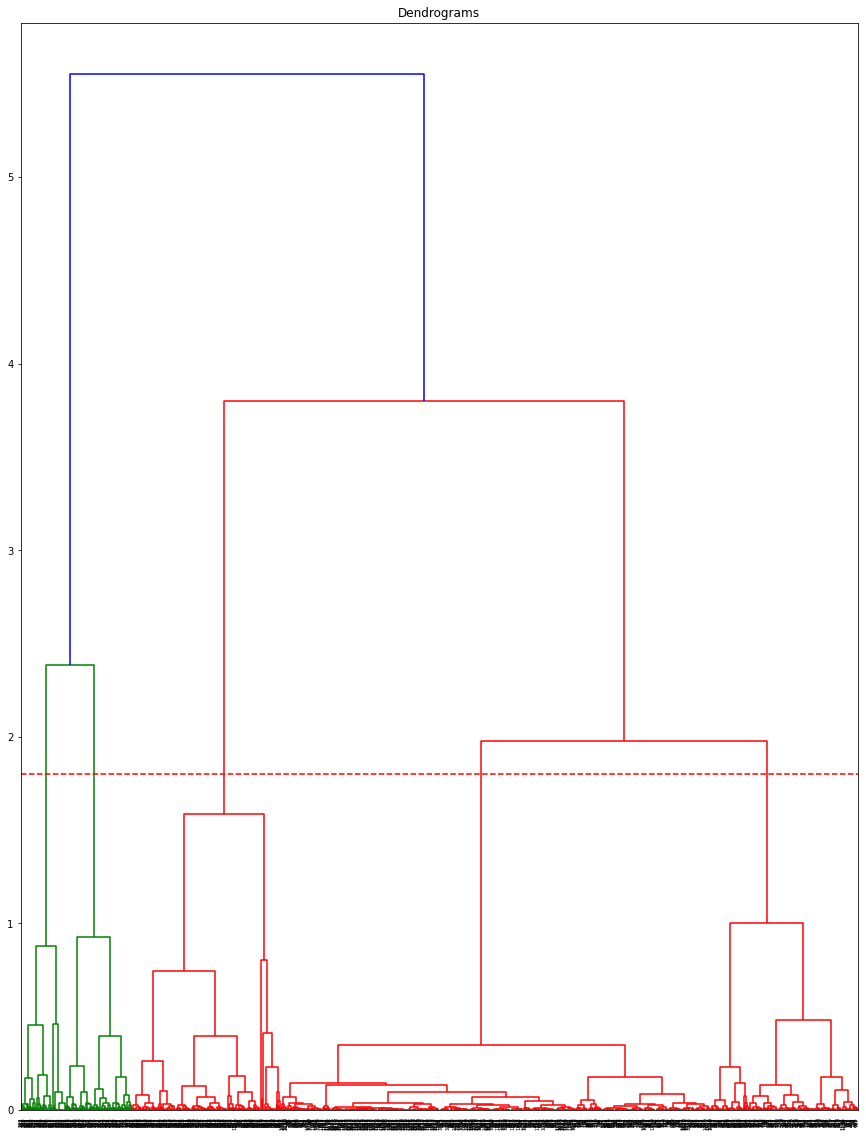

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 20))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Y_sklearn, method='ward'))
plt.axhline(y=1.8, color='r', linestyle='--')

# **KMean**

In [ ]:
#TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline

stopwords = [l.rstrip() for l in open("/content/drive/MyDrive/L4S1/FYP/my/Clustering news/sinhala.txt")]
hasher = TfidfVectorizer(tokenizer=text_process,min_df=10, ngram_range=(1,3),stop_words=stopwords)
vectorizer = make_pipeline(hasher, TfidfTransformer())
# documents is a list of all text in a given article
X_train_tfidf = vectorizer.fit_transform(data['stemmed_text'].values.astype(str))

tf_idf_array = X_train_tfidf.toarray()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sklearn_pca = PCA(n_components = 2) # Using PCA to remove cols which has less co-relation
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array) #fit_transform() is used to scale training data to learn parameters such as 
# mean & variance of the features of training set and then these parameters are used to scale our testing data.

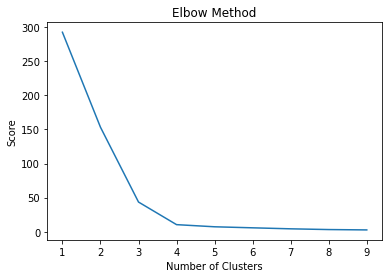

In [ ]:
def elbow_method(Y_sklearn):
    """
    This is the function used to get optimal number of clusters in order to feed to the k-means clustering algorithm.
    """

    number_clusters = range(1, 10)  # Range of possible clusters that can be generated
    kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters] # Getting no. of clusters 

    score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))] # Getting score corresponding to each cluster.
    score = [i*-1 for i in score] # Getting list of positive scores.
    
    plt.plot(number_clusters, score)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Score')
    plt.title('Elbow Method')
    plt.show()
elbow_method(Y_sklearn)

In [ ]:
# As concluded using Elbow Method.
n_clusters = 3
kmeans = KMeans(n_clusters= n_clusters, max_iter=400, algorithm = 'auto')# Partition 'n' no. of observations into 'k' no. of clusters. 
fitted = kmeans.fit(Y_sklearn) # Fitting k-means model  to feature array
prediction = kmeans.predict(Y_sklearn) # predicting clusters class '0' or '1' corresponding to 'n' no. of observations

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    # Get unique labels, in this case {0,1}
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # Get indices for each feature corresponding to each cluster.        
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = hasher.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means] # Retrieve corresponding best features to that of best scores.
        Df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(Df) # append both the Dataframes to a list
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 30)


In [ ]:
# Creating csv files of top 20 features extracted
for i, df in enumerate(dfs):
    # Using enumerate() to add counter to an iterable list dfs.
    df.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Multigram_DF_Cluster'+str(i)+'.csv') 

In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/News/intermediate_n.csv')

In [ ]:
#full code 2021/09/26
from mlxtend.frequent_patterns import fpgrowth, association_rules
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

co = []

for doc in temp['data']:
  if isinstance(doc,str):
    co.append(doc)

vect = TfidfVectorizer(tokenizer=text_process,use_idf=True,max_df=0.9,min_df=0.0)
x = vect.fit_transform(co)
tf_idf_array = x.toarray()
word_positions = {v: k for k, v in vect.vocabulary_.items()}

true_k = 5
model = KMeans(n_clusters=true_k, random_state=42, n_jobs=-1)
#y_pred = model.fit_predict(Y_sklearn)
model.fit(x)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
#save top 100 words in the clusrer
#print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vect.get_feature_names()
for i in range(true_k):
    #print("Cluster %d:" % i)
    data = []
    for ind in order_centroids[i, :100]:
        #print(' %s' % terms[ind])
        data.append(terms[ind])
    df = pd.DataFrame(data=data,columns=['Data'])
    df.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/2021_09_26_Cluster'+str(i)+'.csv')

In [ ]:
Y = vect.transform(co)
y_pred = model.predict(Y)
#clustered_doc = [co,y_pred]
cl_doc = pd.DataFrame(data=co,columns=['Doc'])
cl_doc['Cluster'] = y_pred
cl_doc.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/2021_09_26_Cluster_data.csv')

In [ ]:
cluster_ids = set(y_pred)
np.bincount(y_pred)
min_support = 0.05
dist_words = sorted(v for k, v in word_positions.items()) # distinct words in the vocabulary
for cluster_id in cluster_ids:

    tfidf = tf_idf_array[y_pred == cluster_id]
    # encoded as binary "presence/absence" representation as required by mlxtend
    tfidf[tfidf > 0] = 1
    # df is a pandas sparse dataframe
    df = pd.DataFrame(tfidf, columns=dist_words)
    fset = fpgrowth(df, min_support=min_support, use_colnames=True).sort_values(by='support', ascending=False)

    fp = pd.DataFrame(fset,columns=['support','itemsets'])
    fp.to_csv('/content/drive/MyDrive/L4S1/FYP/my/fp_t'+str(cluster_id)+'.csv')

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

min_support = 0.08
dist_words = sorted(v for k, v in word_positions.items()) # distinct words in the vocabulary
# for cluster_id in cluster_ids:
print(f"FP-Growth results on Cluster {cluster_id} with min support {min_support}")
    # encoded as binary "presence/absence" representation as required by mlxtend
tf_idf_array[tf_idf_array > 0] = 1
    # df is a pandas sparse dataframe
df = pd.DataFrame(tf_idf_array, columns=dist_words)
fset = fpgrowth(df, min_support=min_support, use_colnames=True).sort_values(by='support', ascending=False)
print(fset, '\n')

FP-Growth results on Cluster 1 with min support 0.08
     support       itemsets
57  0.357270        (සඳහන්)
12  0.270390       (පාස්කු)
0   0.260638          (කළේ)
2   0.234929       (ප්රකාශ)
1   0.234929          (ඔහු)
..       ...            ...
77  0.081560  (ප්රකාශ, ඔහු)
33  0.080674      (සම්බන්ධ)
69  0.080674      (විමර්ශන)
44  0.080674       (ආරක්ෂක)
11  0.080674        (සිටින)

[107 rows x 2 columns] 



# **LDA**

Find the most significant words in each cluster. K-means clustered the articles but did not label the topics. Through topic modeling we will find out what the most important terms for each cluster are. This will add more meaning to the cluster by giving keywords to quickly identify the themes of the cluster.

**For Multigram concat clusters**

In [ ]:
temp_df = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/2021_09_26_Cluster_data.csv')

In [ ]:
dataframe_list = []

#for i in cluster_ids:
for i in range(0,5):
  x = temp_df
  #print(x)
  mask = temp_df['Cluster'] == i
  cl = x.loc[mask]
  dataframe_list.append(cl)


In [ ]:
dataframe_list[1]

In [ ]:
#call method for tokenizing
#for model testing
y = []
for doc in result['lemma']:
  y.append(text_process(str(doc)))

In [ ]:
!pip install nltk==3.6.2

     |████████████████████████████████| 1.5 MB 17.2 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
#5-3
#bigram model training
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict
from nltk.probability import FreqDist

# Create a placeholder for model
model_bigram = defaultdict(lambda: defaultdict(lambda: 0))
model_trigram = defaultdict(lambda: defaultdict(lambda: 0))

# Count frequency of co-occurance 

fdlist = FreqDist(list_of_tokens)
unigram = fdlist.items()
unigramFreq = pd.DataFrame(list(unigram), columns=['unigram','freq']).sort_values(by='freq', ascending=False)
model_unigram = unigramFreq.loc[unigramFreq['freq']>0]


for w_train in list_of_articles:
  for p1, p2 in nltk.ngrams(w_train, 2):
      model_bigram[(p1)][p2] += 1
   
for w_train in list_of_articles:
  for t1,t2,t3 in nltk.ngrams(w_train, 3):
      model_trigram[(t1,t2)][t3] += 1

final_gram = []
output = []
for w_train in list_of_articles:
  w_gram = []
  results = ""
  for doc in model_unigram['unigram']:
    for i in w_train:
      if (doc == i) & (doc not in w_gram):
        w_gram.append(doc)
        results+=doc+' '
  for a1, a2 in nltk.ngrams(w_train, 2):
    if model_bigram[(a1)][a2] > 5:
      freq_bigram = a1+"_"+a2
      if freq_bigram not in w_gram:
       w_gram.append(freq_bigram)
       results+=freq_bigram+' '
  for b1, b2, b3 in nltk.ngrams(w_train, 3):
    if model_trigram[(b1,b2)][b3] > 5:
      freq_trigram = b1+"_"+b2+"_"+b3
      if freq_trigram not in w_gram:
        w_gram.append(freq_trigram)
        results+=freq_trigram+' '
  output.append(w_gram)
  final_gram.append(results)
#final_gram[:4]

In [ ]:
#data_gram = pd.DataFrame()
result['data'] = final_gram
result['other'] = output
#data_gram['DateTime'] = result['Date']

In [ ]:
result.to_csv('/content/drive/MyDrive/L4S1/FYP/my/News/intermediate_n.csv')

In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/News/intermediate_n.csv')

In [ ]:
from sklearn.model_selection import train_test_split

temp_train, temp_test = train_test_split(temp,
                                   test_size = 0.5,
                                   random_state = 42)

In [ ]:
temp.head()

,Unnamed: 0,Unnamed: 0.1,Headline,Date,Urls,stopword_removed,stemmed_text,lemma,data,other
0,0,14,අනුරගෙන් සජිත්ට නොසිතූ දැඩි ප‍්‍රහාරයක්…,2021-09-13,https://lankacnews.com/60051-2/,පවතින තත්ත්වය ආණ්ඩුව රට පාලනය නොහැකි මැතිවරණයක...,පවතින තත්ත්වය ආණ්ඩුව රට පාලනය නොහැකි මැතිවරණයක...,පවතින තත්ත්වය ආණ්ඩුව රට පාලනය මැතිවරණයක් විපක්...,ඔහු ප්රකාශ කළේ වාර්තා මාධ්ය සිය මහතා කල් අපි ප...,"['ඔහු', 'ප්රකාශ', 'කළේ', 'වාර්තා', 'මාධ්ය', 'ස..."
1,1,16,ඉතාලියේදී අගමැති මහින්දට එරෙහිව ලාංකිකයන් විරෝ...,2021-09-12,https://lankacnews.com/%e0%b6%89%e0%b6%ad%e0%b...,අගමැති මහින්ද රාජපක්ෂ මහතාගේ ඉතාලි සංචාරය අතරත...,අගමැති මහින්ද රාජපක්ෂ මහතාගේ ඉතාලි සංචාරය අතරත...,අගමැති මහින්ද රාජපක්ෂ මහතාගේ ඉතාලි සංචාරය අතරත...,ලංකා පාස්කු කිරීම ලංකාව ඔවුන් බවයි ප්රහාරය දින...,"['ලංකා', 'පාස්කු', 'කිරීම', 'ලංකාව', 'ඔවුන්', ..."
2,2,19,අගමැති මහින්ද ඉතාලියේ.. ඉතාලියේ ලාංකිකයන් විරෝ...,2021-09-11,https://lankacnews.com/%e0%b6%85%e0%b6%9c%e0%b...,ඉතාලියේ සිටින ලාංකිකයන් හෙට දිනයේ එරට බොලොඤ්ඤා...,ඉතාලියේ සිටින ලාංකිකයන් හෙට දිනයේ එරට බොලොඤ්ඤා...,ඉතාලිය සිටින ලාංකිකයන් හෙට දිනයේ බොලොඤ්ඤා නගරය...,ලංකා පාස්කු ඔහු ජනාධිපති මාධ්ය මහතා රාජපක්ෂ රා...,"['ලංකා', 'පාස්කු', 'ඔහු', 'ජනාධිපති', 'මාධ්ය',..."
3,3,45,නොදන්නා දේ නොකියා හිටපං අප්පුහාමි…- ඥානසාර හිම...,2021-09-06,https://lankacnews.com/%e0%b6%b1%e0%b7%9c%e0%b...,පසුගිය සතියේ මාධ්‍ය හමුවකදී බොදු බල සේනා සංවිධ...,පසුගිය සතියේ මාධ්ය හමුවකදී බොදු බල සේනා සංවිධා...,සතියේ මාධ්ය හමුවකදී බෞද්ධ බල සේනා සංවිධානය විව...,ලංකා පාස්කු කිරීම අත්අඩංගුවට ජනාධිපති ලංකාව මා...,"['ලංකා', 'පාස්කු', 'කිරීම', 'අත්අඩංගුවට', 'ජනා..."
4,4,51,ප‍්‍රකට භික්‍ෂුවක් පහන්තුඩා වීඩියෝව නරඹලා.. වි...,2021-09-04,https://lankacnews.com/%e0%b6%b4%e2%80%8d%e0%b...,බෙලිහුල්ඔය පහන්තුඩාව ඇල්ල රූගත ලද අසභ්‍ය වීඩිය...,බෙලිහුල්ඔය පහන්තුඩාව ඇල්ල රූගත ලද අසභ්ය වීඩියෝ...,බෙලිහුල්ඔය පහන්තුඩාව ඇල්ල රූගත අසභ්ය වීඩියෝව ප...,ජනාධිපති පරීක්ෂණ රාජපක්ෂ පත් පියවර සංවිධානය අව...,"['ජනාධිපති', 'පරීක්ෂණ', 'රාජපක්ෂ', 'පත්', 'පිය..."


**For seperate cluster**

In [ ]:
clusters = []


for w in dataframe_list:
  d = []
  for val in w['Doc']:
    d.append(text_process(str(val)))
    #d.append(c)
  clusters.append(d)

In [ ]:
len(clusters)

5

In [ ]:
import gensim

dictionary = []

for i in range(0,len(clusters)):
  dictionary.append(gensim.corpora.Dictionary(clusters[i]))


In [ ]:
#filter
for i in range(0,len(clusters)):
  dictionary[i].filter_extremes(no_above=0.5, keep_n=100000000)

In [ ]:
bow_corpus = []

for i in range(0,len(clusters)):
  bow_corpus.append(dictionary[i].doc2bow(doc) for doc in clusters[i])

In [ ]:
from gensim import corpora, models

tf_idf_corpus = []
for i in range(0,len(clusters)):
  tfidf = models.TfidfModel(bow_corpus[i])
  corpus_tfidf = tfidf[bow_corpus[i]]
  tf_idf_corpus.append(corpus_tfidf)

In [ ]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary[4], corpus=tf_idf_corpus[4], texts=clusters[4], start=2, limit=10, step=2)

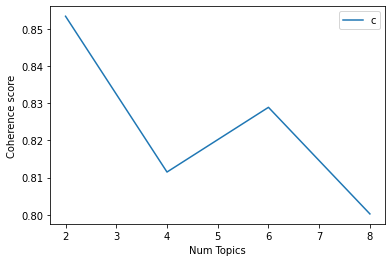

In [ ]:
# Show graph
import matplotlib.pyplot as plt

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
def model_lda(corpus,dictionary,n):
  model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=n)
  return model

In [ ]:
#final models
lda_model_final = []
topic = [4,2,2,2,2]

for num in range(0,len(clusters)):
  lda_model_final.append(model_lda(corpus = tf_idf_corpus[num],dictionary = dictionary[num],n=topic[num]))


In [ ]:
for m in range(0,len(lda_model_final)):
  lda_model_final[m].save('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Topic Modeling/model_lemma_2021_09_28'+str(m))

In [ ]:
lda = []
#len(lda_model_final
for m in range(0,5):
  lda.append(gensim.models.LdaMulticore.load('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Topic Modeling/model_lemma_2021_09_28'+str(m)))


In [ ]:
trained_data = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/tweets_topic_after_training.csv')#aftertrainng

In [ ]:
topic_testing_multigram = pd.DataFrame()
topic_testing_multigram['Date'] = trained_data['Date']
#topic_testing_multigram['Unseen_doc'] = final_gram
topic_testing_multigram['Unseen_doc'] = trained_data['text']

z = []
for doc in trained_data['text']:
  z.append(text_process(str(doc)))
  
for j in range(0,len(clusters)):
  Topics = []
  Scores = []
  for i in z:
    bow_vector = dictionary[j].doc2bow(i)
    for index, score in sorted(lda[j][bow_vector], key=lambda tup: -1*tup[1]):
      #print(score)
      Topics.append(format(lda[j].print_topic(index, 10)))
      s=round(score,4)
      Scores.append(s)
      break
      #break

  topic_testing_multigram['Topic cluster'+str(j+1)] = Topics
  topic_testing_multigram['Score cluster'+str(j+1)] = Scores


In [ ]:
topic = []
scores = []

val = 0
col = list(topic_testing_multigram.columns)
col.remove('Date')
col.remove('Unseen_doc')
for j in range(0,len(clusters)):
  col.remove('Topic cluster'+str(j+1))

for index, row in topic_testing_multigram.iterrows():
  row_col = []
  for c in col:
    row_col.append(row[str(c)])

  val = max(row_col)
  for j in range(0,len(clusters)):
    if val == row['Score cluster'+str(j+1)]:
      topic.append(row['Topic cluster'+str(j+1)])
      f = round(row['Score cluster'+str(j+1)],4)
      scores.append(f)
      break

In [ ]:
topic_testing_multigram['Category'] = topic
topic_testing_multigram['Score'] = scores

In [ ]:
topic_testing_multigram = topic_testing_multigram[topic_testing_multigram.astype(str)['Unseen_doc'] != '[]']

In [ ]:
topic_testing_multigram.shape[0]

10794

In [ ]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansSinhala-hinted.zip"

--2022-01-10 15:02:00--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansSinhala-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.250.145.128, 2a00:1450:4013:c14::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9285540 (8.9M) [application/zip]
Saving to: ‘NotoSansSinhala-hinted.zip’

NotoSansSinhala-hin 100%[===================>]   8.85M  22.0MB/s    in 0.4s    

2022-01-10 15:02:01 (22.0 MB/s) - ‘NotoSansSinhala-hinted.zip’ saved [9285540/9285540]



In [ ]:
!unzip "NotoSansSinhala-hinted.zip"

Archive:  NotoSansSinhala-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansSinhala-Black.ttf  
  inflating: NotoSansSinhala-Bold.ttf  
  inflating: NotoSansSinhala-Condensed.ttf  
  inflating: NotoSansSinhala-CondensedBlack.ttf  
  inflating: NotoSansSinhala-CondensedBold.ttf  
  inflating: NotoSansSinhala-CondensedExtraBold.ttf  
  inflating: NotoSansSinhala-CondensedExtraLight.ttf  
  inflating: NotoSansSinhala-CondensedLight.ttf  
  inflating: NotoSansSinhala-CondensedMedium.ttf  
  inflating: NotoSansSinhala-CondensedSemiBold.ttf  
  inflating: NotoSansSinhala-CondensedThin.ttf  
  inflating: NotoSansSinhala-ExtraBold.ttf  
  inflating: NotoSansSinhala-ExtraCondensed.ttf  
  inflating: NotoSansSinhala-ExtraCondensedBlack.ttf  
  inflating: NotoSansSinhala-ExtraCondensedBold.ttf  
  inflating: NotoSansSinhala-ExtraCondensedExtraBold.ttf  
  inflating: NotoSansSinhala-ExtraCondensedExtraLight.ttf  
  inflating: NotoSansSinhala-ExtraCondensedLight.ttf  
  inflatin

In [ ]:
graph = topic_testing_multigram.groupby(['Date','Category'])['Unseen_doc'].count().unstack()
graph.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Topic Modeling/kmeans_tweet_lemma_2021_11_07.csv')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


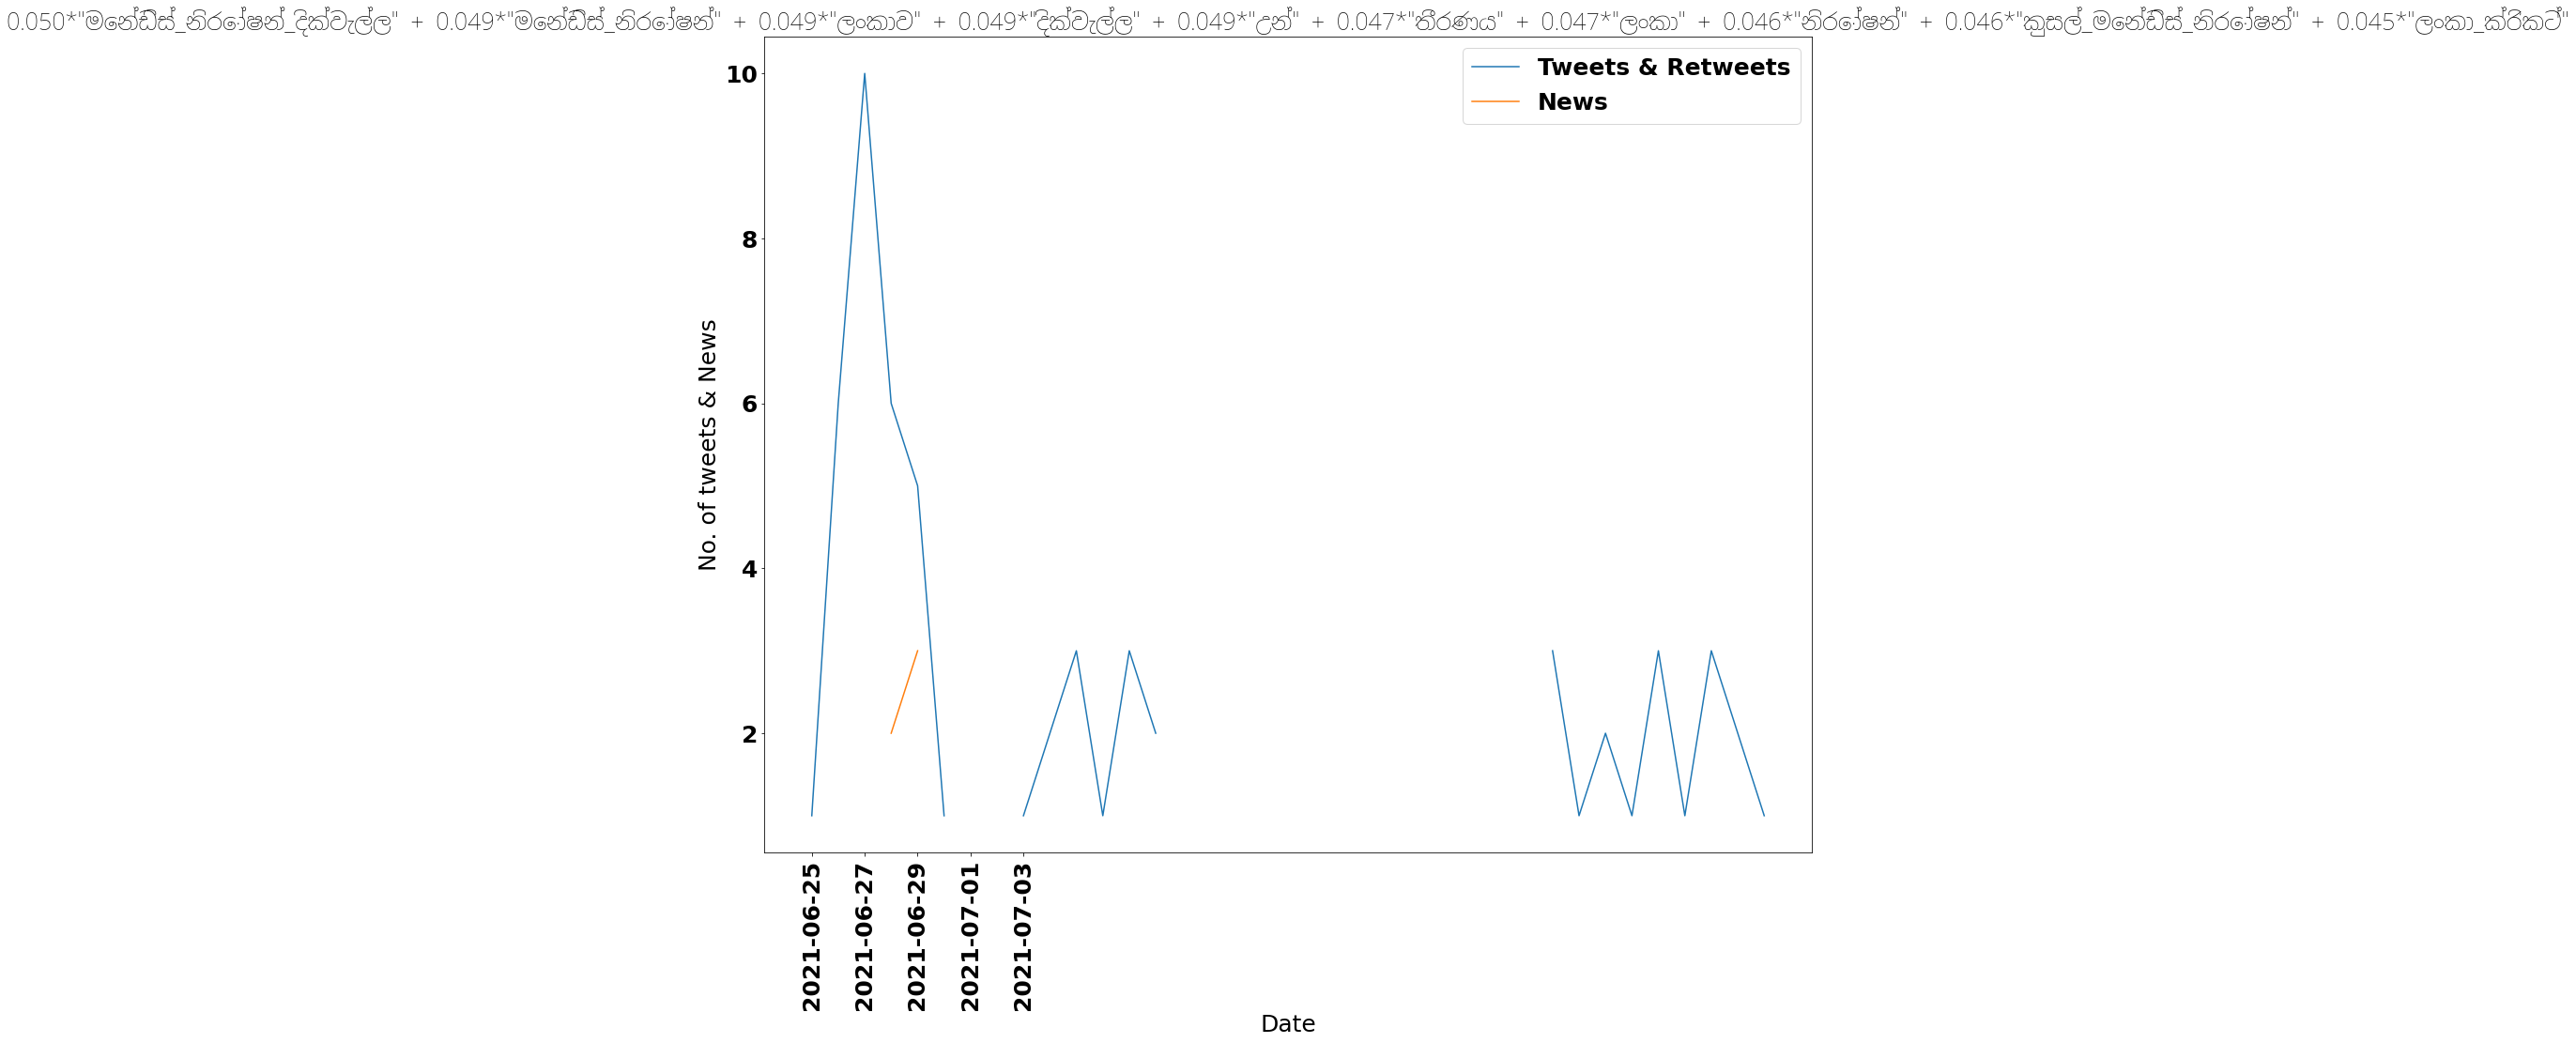

In [ ]:
#Merge sort parallel performance with 2 processors
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.font_manager as fm

# point to the font location with an absolute path
path = Path('/content/NotoSansSinhalaUI-Thin.ttf')

# configure the Hindi font
#sinhala_font = FontProperties(fname=nirm)

graph_data_tweet = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Topic Modeling/kmeans_tweet_lemma_2021_11_07.csv', error_bad_lines=False);
graph_data_news = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Topic Modeling/kmeans_news_lemma_2021_09_28.csv', error_bad_lines=False);
start = '2021-06-24'
end = '2021-07-31'
mask1 = (graph_data_tweet['Date']>start) & (graph_data_tweet['Date']<=end)
mask2 = (graph_data_news['Date']>start) & (graph_data_news['Date']<=end)
graph_data_tweet = graph_data_tweet.loc[mask1]
graph_data_news = graph_data_news.loc[mask2]
fontprop = fm.FontProperties(fname=path)
columns = list(graph_data_tweet.columns)
fig,ax = plt.subplots(figsize=(20,16))

# Setting the interval of ticks of x-axis to 5.
listOf_Xticks = np.arange(0, 10, 2)
plt.xticks(listOf_Xticks)


plt.plot(graph_data_tweet[columns[0]], graph_data_tweet[columns[7]],label='Tweets & Retweets')
plt.plot(graph_data_news[columns[0]], graph_data_news[columns[7]],label='News')

plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('No. of tweets & News')
ax.set_title(columns[7],fontproperties=fontprop)
plt.legend()

plt.show()

For the evaluation predicted outcomes were used to plot a graph after applying topic modeling to it. Following shows the two graphs which were plotted for the topic of bio-bubble breach committed by several players of the Sri Lankan cricket team during their tour of England. The resulted graph is almost similar to the initial graph where no labelled or predicted data were used. Thus, it can be concluded that related to the selected topic, social media has created an impact on news dissemination in mass media.

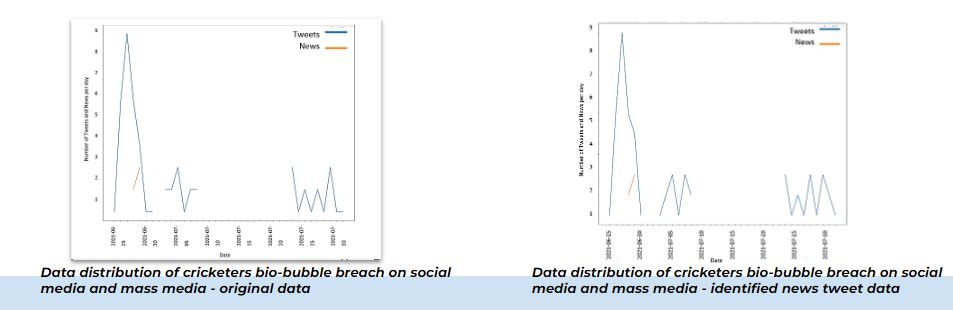


In [ ]:
topic_testing_multigram.to_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Topic Modeling/n_lemma_2021_09_28.csv')

In [ ]:
topic_testing_multigram.head()

,Date,Unseen_doc,Topic cluster1,Score cluster1,Topic cluster2,Score cluster2,Topic cluster3,Score cluster3,Topic cluster4,Score cluster4,Topic cluster5,Score cluster5,Category,Score
0,2021-06-10,තුන් සියයකට ආසන්න අහිංසක ජනයා ඝාතනය පාස්කු ඉරි...,"0.011*""කතාව"" + 0.011*""තීරණය"" + 0.010*""දින"" + 0...",0.5896,"0.161*""සරත්"" + 0.154*""හංසමාලි"" + 0.147*""පියුමි...",0.5,"0.067*""පාසල්"" + 0.067*""ගෙදර"" + 0.066*""පුළුවන්""...",0.5000,"0.050*""මෙන්ඩිස්_නිරෝෂන්_දික්වැල්ල"" + 0.049*""මෙ...",0.5000,"0.037*""ජනාධිපති"" + 0.036*""ත්රිපුද්ගල"" + 0.035*...",0.5495,"0.011*""කතාව"" + 0.011*""තීරණය"" + 0.010*""දින"" + 0...",0.5896
1,2021-06-10,ඈ මැට්ටෝ ගෝඨා ආවේ රටක් නීතියක් කියලා නැනෝ ටෙක්...,"0.010*""සිල්වා"" + 0.010*""උන්"" + 0.010*""මුදල්"" +...",0.7981,"0.161*""සරත්"" + 0.154*""හංසමාලි"" + 0.147*""පියුමි...",0.5,"0.071*""දෙයක්"" + 0.069*""මෙහෙකාර"" + 0.063*""කතා"" ...",0.6485,"0.050*""මෙන්ඩිස්_නිරෝෂන්_දික්වැල්ල"" + 0.049*""මෙ...",0.6609,"0.037*""ජනාධිපති"" + 0.036*""ත්රිපුද්ගල"" + 0.035*...",0.5219,"0.010*""සිල්වා"" + 0.010*""උන්"" + 0.010*""මුදල්"" +...",0.7981
2,2021-06-10,ජමීල් අභිරහස නිලන්ත කට්ටි පැනීම පාස්කු දින ප්ර...,"0.011*""කතාව"" + 0.011*""තීරණය"" + 0.010*""දින"" + 0...",0.7331,"0.161*""සරත්"" + 0.154*""හංසමාලි"" + 0.147*""පියුමි...",0.5,"0.067*""පාසල්"" + 0.067*""ගෙදර"" + 0.066*""පුළුවන්""...",0.5000,"0.050*""මෙන්ඩිස්_නිරෝෂන්_දික්වැල්ල"" + 0.049*""මෙ...",0.5000,"0.037*""ජනාධිපති"" + 0.036*""ත්රිපුද්ගල"" + 0.035*...",0.7900,"0.037*""ජනාධිපති"" + 0.036*""ත්රිපුද්ගල"" + 0.035*...",0.7900
3,2021-06-10,මෛත්රී ජනාධිපතිවරයා මං අදටත් ගරු දේශපාලන නායකත...,"0.010*""ඔලිම්පික්_උළෙල"" + 0.010*""ඇමති"" + 0.010*...",0.7263,"0.161*""සරත්"" + 0.154*""හංසමාලි"" + 0.147*""පියුමි...",0.5,"0.071*""දෙයක්"" + 0.069*""මෙහෙකාර"" + 0.063*""කතා"" ...",0.5860,"0.050*""මෙන්ඩිස්_නිරෝෂන්_දික්වැල්ල"" + 0.049*""මෙ...",0.5000,"0.037*""දඬුවම්"" + 0.037*""දේශපාලන"" + 0.036*""නීති...",0.8496,"0.037*""දඬුවම්"" + 0.037*""දේශපාලන"" + 0.036*""නීති...",0.8496
4,2021-06-09,මේකයි අයියේ පැදුරෙන් බිමට වැටෙන්න දෙයක් මහින්ද...,"0.010*""ඔලිම්පික්_උළෙල"" + 0.010*""ඇමති"" + 0.010*...",0.8381,"0.161*""සරත්"" + 0.154*""හංසමාලි"" + 0.147*""පියුමි...",0.5,"0.071*""දෙයක්"" + 0.069*""මෙහෙකාර"" + 0.063*""කතා"" ...",0.7071,"0.050*""මෙන්ඩිස්_නිරෝෂන්_දික්වැල්ල"" + 0.049*""මෙ...",0.5000,"0.037*""දඬුවම්"" + 0.037*""දේශපාලන"" + 0.036*""නීති...",0.5000,"0.010*""ඔලිම්පික්_උළෙල"" + 0.010*""ඇමති"" + 0.010*...",0.8381


# **Deep Learning Based model for Textual and Non Textual information Classification - Social media => Mass Media**

In [ ]:
input = pd.read_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/tweets_topic_data_2021_12_01.csv')

In [ ]:
input['category'].value_counts()

News-Tweet       13829
No-News-Tweet    10293
Name: category, dtype: int64

In [ ]:
del input['Unnamed: 0.1']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#3
#tokenize
def text_process(text):
  output = []
  count = 0
  tokenized_data = word_tokenize(text)
  for token in tokenized_data:
    if token not in nltk.corpus.stopwords.words('sinhala.txt'):
      if token != 'nan':
        count+=1
        output.append(token) 
  return output,count

In [ ]:
#call method for tokenizing
#for model testing
list_of_articles = []
word_count = []
for doc in input['lemma_new']:
  t,l = text_process(str(doc))
  list_of_articles.append(t)
  word_count.append(l)

list_of_tokens = [item for items in list_of_articles for item in items]

Equation (1) and (2) shows how emotiveness and percentage of content words were calculated. Emotiveness was computed as the sum of the number of adjectives and adverbs over the sum of nouns and verbs [Zhou et al, 2002]. The percentage of content words denotes the rich text with meaning. Content words are words that have meaning. Nouns, verbs, adjectives, and adverbs are content parts of speech [Oliveiria, 2021].


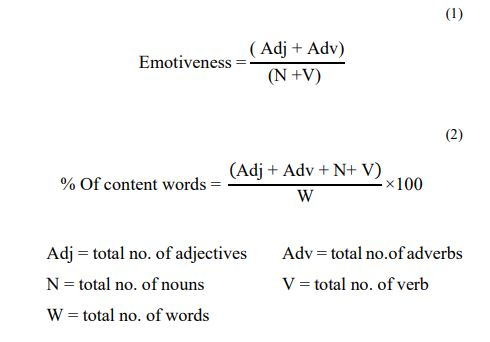

In [ ]:
content_word_perc = []
emotiveness = []
media_availability = []
input['media'] = input['media'].astype(str)
for index,row in input.iterrows():
  if word_count[index] != 0:
    word_perc = (row['Noun_count']+row['Verb_count']+row['Adj_count']+row['Adv_count'])/(word_count[index])
  else:
    word_perc = 0

  if row['Noun_count'] !=0 | row['Verb_count'] != 0:
    emo = (row['Adj_count']+row['Adv_count'])/(row['Noun_count']+row['Verb_count'])
  else:
    emo = 0
 
  if row['media'] == 'nan':
    med = 0
  else:
    med = 1
    
  content_word_perc.append(word_perc)
  emotiveness.append(emo)
  media_availability.append(med)

In [ ]:
input['content_word_perc'] = content_word_perc
input['emotiveness'] = emotiveness
input['media_availability'] = media_availability

In [ ]:
!pip install helasentilex

     |████████████████████████████████| 65 kB 2.2 MB/s 


In [ ]:
#sentimental
import helasentilex

sentimental = []
for w in list_of_articles:
  positive = 0
  negative = 0
  neutral = 0
  for token in w:
    if helasentilex.sentiment(token) == 1:
      positive+=1
    elif helasentilex.sentiment(token) == -1:
      negative+=1
    elif helasentilex.sentiment(token) == 0:
      neutral+=1
  if positive > negative:
    sentimental.append(1)
  elif positive < negative:
    sentimental.append(-1)
  else:
    sentimental.append(0)

In [ ]:
#extract user features from user object
followersCount = []
friendsCount = []
favouritesCount = []

for i in range(input.shape[0]):
  x = input['user'][i].replace('\'','"')
  val = x.split(',')
  for n in val:
    n = n.split(':')
    if n[0] == ' "followersCount"':
      followers = int(n[1])
      followersCount.append(followers)
      
    if n[0] == ' "friendsCount"':
      friends = int(n[1])
      friendsCount.append(friends)
    if n[0] == ' "favouritesCount"':
      favourites = int(n[1])
      favouritesCount.append(favourites)
    
  
print(input.shape[0])
print(len(followersCount))
print(len(friendsCount))
print(len(favouritesCount))

24122
24122
24122
24122


In [ ]:
news_model_df = pd.DataFrame()
news_model_df['date'] = input['Date']
news_model_df['text'] = input['lemma_new']
news_model_df['replyCount'] = input['replyCount']#tweets
news_model_df['retweetCount'] = input['retweetCount']#tweets
news_model_df['likeCount'] = input['likeCount']#tweets
news_model_df['friendsCount'] = friendsCount#tweets
news_model_df['followersCount'] = followersCount#tweets
news_model_df['favouritesCount'] = favouritesCount#tweets
news_model_df['media_availability'] = media_availability#tweets
news_model_df['content_word_perc'] = content_word_perc
news_model_df['emotiveness'] = emotiveness
news_model_df['sentimental'] = sentimental
news_model_df['class'] = input['category']

In [ ]:
news_model_df.to_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/Input_tweets_topic_2021_12_01.csv')

In [ ]:
!pip install keras==2.6.0

In [ ]:
#create model for textual and non textual features
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.fasttext import FastText
from keras.backend import clear_session

import pandas as pd
import numpy as np
import re
import os

In [ ]:
news_model_df= pd.read_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/Input_tweets_topic_2021_12_01.csv')

In [ ]:
news_model_df['class'].value_counts()

News-Tweet       13829
No-News-Tweet    10293
Name: class, dtype: int64

In [ ]:
#divide features and label columns
#x for features
#y for labels
X = news_model_df.drop('class', axis=1)

y = news_model_df['class']

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Encode labels in column 'class'.
y_train_t = label_encoder.fit_transform(y_train)
y_test_t = label_encoder.fit_transform(y_test)

from tensorflow.keras.utils import to_categorical
y_train_t = to_categorical(y_train_t)
y_test_t = to_categorical(y_test_t)

In [ ]:
X1_train = []
for sen in X_train['text']:
  if isinstance(sen,str):
    X1_train.append(sen)
  else:
    X1_train.append(" ")

X1_test = []
for sen in X_test['text']:
  if isinstance(sen,str):
    X1_test.append(sen)
  else:
    X1_test.append(" ")

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X1_train)

X1_train_t = tokenizer.texts_to_sequences(X1_train)
X1_test_t = tokenizer.texts_to_sequences(X1_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 300

X1_train_t = pad_sequences(X1_train_t, padding='post', maxlen=maxlen)
X1_test_t = pad_sequences(X1_test_t, padding='post', maxlen=maxlen)

In [ ]:
word_embedding_path = '/content/drive/MyDrive/FYP_Other/FYP/my/300/fastText_300_5'
embedding_matrix_path = '/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/fasttext_jan_300_5'
word_embedding_keydvectors_path = '/content/drive/MyDrive/FYP_Other/FYP/my/keyed.kv'

In [ ]:
#fasttext
import io
from numpy import array
from numpy import asarray
from numpy import zeros

word_embedding_model = FastText.load(word_embedding_path)
    
word_vectors = word_embedding_model.wv
word_vectors.save(word_embedding_keydvectors_path)
word_vectors = KeyedVectors.load(word_embedding_keydvectors_path, mmap='r')

embeddings_index = dict()
for word, vocab_obj in word_vectors.vocab.items():
  embeddings_index[word]=word_vectors[word]

# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
X2_train = X_train[['replyCount','retweetCount','likeCount','content_word_perc', 'emotiveness','sentimental','media_availability']].values
X2_test = X_test[['replyCount','retweetCount','likeCount','content_word_perc', 'emotiveness','sentimental','media_availability']].values

In [ ]:
input_1 = Input(shape=(maxlen,))
input_2 = Input(shape=(7,))

With extracted features as the input, the Neural Network model has been trained to identify the impact of Twitter data on the creation of Mass Media news. As there are two types of inputs, the ***Keras functional API*** was employed in implementation. For text inputs, the ***embedding layer*** and ***LSTM layer*** have been added as basic layers. Word embedding was performed prior to introducing text feature inputs to the model since text data is sequencial and is similar to time series data. According to a study conducted for the word embedding evaluation for Sinhala by Lakmal et al., 2020, it has been identified that the ***FastText word embeddings with 300 dimensions*** performed well than other word embedding techniques such as the Word2Vec. Then the result data is inputted to the Keras embedding layer. The LSTM layer is used because it performs well as it has a good hold over memorizing certain patterns within the data. This initial model appeared to be less accurate after 10 epochs of training. Training (64.15%) and testing (63.45%) loss seem to be higher than the training (62.77%) and testing
(63.93%) accuracy.

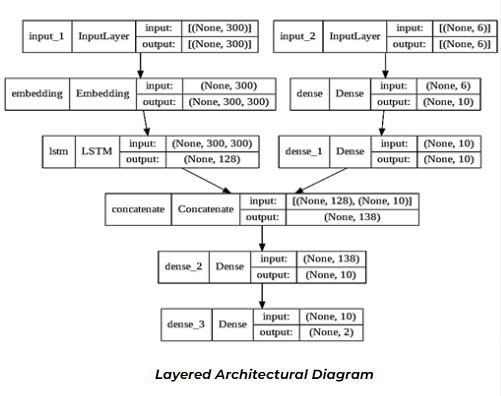

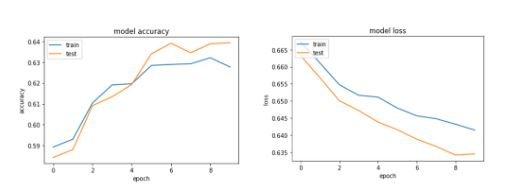

To address the issue, the number of epochs was increased (more training iterations), another LSTM layer was and a dropout layer were added, to control the network and maintain it as free of bias as possible. As a 
result, the training (65.63%) and testing (65.75%) accuracy were increased over training (61.06%) and testing (61.04%) loss.

In [ ]:
#1st sub model for text features
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=True)(input_1)

LSTM_Layer_1 = LSTM(128,activation='relu',return_sequences=True)(embedding_layer)
Dropout_Layer_1 = Dropout(0.2)(LSTM_Layer_1)
LSTM_Layer_2 = LSTM(128,activation='relu')(Dropout_Layer_1)
Dropout_Layer_2 = Dropout(0.2)(LSTM_Layer_2)

In [ ]:
#2nd submodel for non text features
dense_layer_1 = Dense(32, activation='relu')(input_2)
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)

In [ ]:
#concatenate two models
concat_layer = Concatenate()([Dropout_Layer_2, dense_layer_2])
dense_layer_3 = Dense(32, activation='relu')(concat_layer)
output = Dense(2, activation='softmax')(dense_layer_3)
model = Model(inputs=[input_1,input_2], outputs=output)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     11172000    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 300, 128)     219648      ['embedding[0][0]']              
                                                                                                  
 dropout (Dropout)              (None, 300, 128)     0           ['lstm[0][0]']                   
                                                                                              

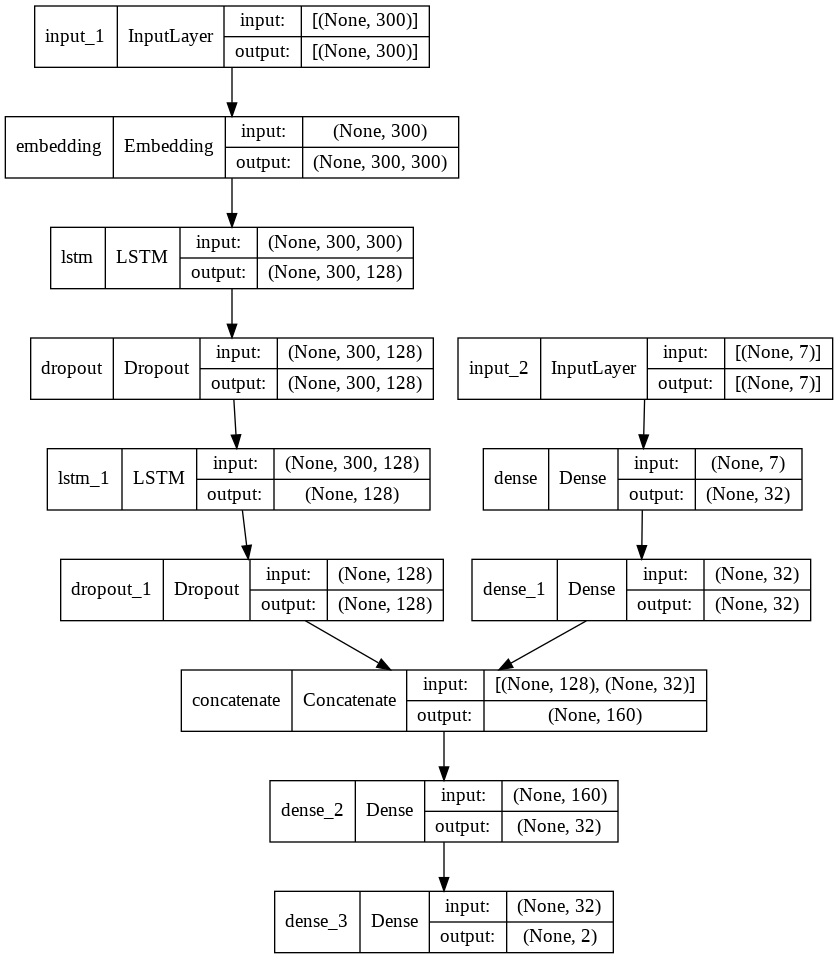

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x=[X1_train_t, X2_train], y=y_train_t, batch_size=128, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
121/121 [==============================] - 403s 3s/step - loss: 0.6807 - acc: 0.5674 - val_loss: 0.6615 - val_acc: 0.5736
Epoch 2/50
121/121 [==============================] - 392s 3s/step - loss: 0.6569 - acc: 0.6078 - val_loss: 0.6472 - val_acc: 0.6275
Epoch 3/50
121/121 [==============================] - 385s 3s/step - loss: 0.6502 - acc: 0.6261 - val_loss: 0.6414 - val_acc: 0.6334
Epoch 4/50
121/121 [==============================] - 382s 3s/step - loss: 0.6453 - acc: 0.6271 - val_loss: 0.6366 - val_acc: 0.6368
Epoch 5/50
121/121 [==============================] - 386s 3s/step - loss: 0.6420 - acc: 0.6324 - val_loss: 0.6308 - val_acc: 0.6472
Epoch 6/50
121/121 [==============================] - 385s 3s/step - loss: 0.6390 - acc: 0.6354 - val_loss: 0.6321 - val_acc: 0.6345
Epoch 7/50
121/121 [==============================] - 389s 3s/step - loss: 0.6338 - acc: 0.6368 - val_loss: 0.6230 - val_acc: 0.6477
Epoch 8/50
121/121 [==============================] - 390s 3s/step - 

In [ ]:
score = model.evaluate(x=[X1_test_t, X2_test], y=y_test_t, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

151/151 [==============================] - 40s 265ms/step - loss: 0.6218 - acc: 0.6441
Test Score: 0.621789813041687
Test Accuracy: 0.6441450715065002
acc: 64.41%


In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/FYP_Other/model_2021_12_01.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/FYP_Other/model_2021_12_01.h5")
print("Saved model to disk")

Saved model to disk
Loaded model from disk
151/151 [==============================] - 41s 267ms/step - loss: 0.6151 - acc: 0.6512
acc: 65.12%


In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/drive/MyDrive/FYP_Other/model_2021_12_01.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/FYP_Other/model_2021_12_01.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
scores = loaded_model.evaluate(x=[X1_test_t, X2_test], y=y_test_t, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))

Loaded model from disk
151/151 [==============================] - 39s 248ms/step - loss: 0.6218 - acc: 0.6441
acc: 64.41%


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

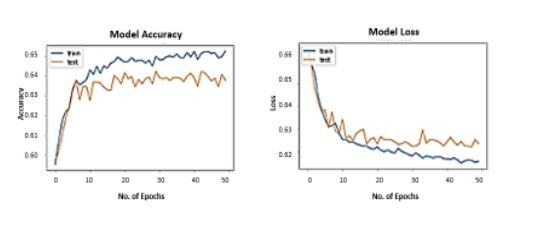

In [ ]:
prediction = loaded_model.predict([X1_test_t, X2_test])

In [ ]:

CLASS = ['News-Tweet','No-News-Tweet']

pred_prb = []
actual = []
for i in range(len(X1_test)):
  val = CLASS[np.argmax(prediction[i])]
  v = prediction[i]
  pred_prb.append(val)
  actual.append(y_test.iloc[i])
  #print(X1_test[i])
  #print(val,'Actual:',,'\n')

pred_df = pd.DataFrame()
pred_df['Date'] = X_test['date']
pred_df['text'] = X1_test
pred_df['media_availability'] = X_test['media_availability']
pred_df['prediction'] = pred_prb
pred_df['actual'] = actual

In [ ]:
#matrics calcultaion
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(actual, pred_prb)
print('Accuracy: %.2f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(actual, pred_prb, pos_label="News-Tweet")
print('Precision: %.2f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(actual, pred_prb, pos_label="News-Tweet")
print('Recall: %.2f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(actual, pred_prb, pos_label="News-Tweet")
print('F1 score: %.2f' % (f1*100))

Accuracy: 64.41
Precision: 64.53
Recall: 84.03
F1 score: 73.00


In [ ]:
data_val = []
actual_val = []
for i in range(len(X1_train)):
  data_val.append(val)
  actual_val.append(y_train.iloc[i])

training_df = pd.DataFrame()
training_df['Date'] = X_train['date']
training_df['text'] = X1_train
training_df['media_availability'] = X_train['media_availability']
training_df['prediction'] = actual_val

In [ ]:
pred_df.to_csv('/content/drive/MyDrive/FYP_Other/FYP/my/News/Deep_L_out_news(2020_12_02).csv')

In [ ]:
pred_df['prediction']

640      No-News-Tweet
17257       News-Tweet
8999        News-Tweet
12072       News-Tweet
12769       News-Tweet
             ...      
10993    No-News-Tweet
18181       News-Tweet
2694        News-Tweet
23884       News-Tweet
3576        News-Tweet
Name: prediction, Length: 4825, dtype: object

In [ ]:
pred_df.drop('actual',axis=1,inplace=True)

In [ ]:
#concat two tables
table_data_dp = [training_df,pred_df]
concat_table_dp = pd.concat(table_data_dp)

In [ ]:
concat_table_dp.to_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/tweets_topic_after_training_all(2021_12_02).csv')

In [ ]:
sample = concat_table_dp[concat_table_dp['prediction']=='News-Tweet']

In [ ]:
sample.to_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/tweets_topic_after_training(2021_12_02).csv')

In [ ]:
clear_session()

In [ ]:
df = concat_table_dp.groupby(['media_availability','prediction'])['text'].count()
df.to_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/SICOR_2021_12_02.csv')

In [ ]:
dd= pd.read_csv('/content/drive/MyDrive/FYP_Other/FYP/my/twitter data/SICOR_2021_12_02.csv')
t = []
y = []
t = concat_table_dp['prediction'].value_counts().sort_index()
x = dd.loc[dd['media_availability'] == 1]['text']
for i in x:
  y.append(i)

In [ ]:
sicor = []

for i in range(len(t)):
  val = (y[i]/t[i])*100
  sicor.append(val)

In [ ]:
dd.prediction.unique()

array(['News-Tweet', 'No-News-Tweet'], dtype=object)

In [ ]:
topics = ['News-Tweet','No-News-Tweet']
sicor_df = pd.DataFrame()
sicor_df['topics'] = topics
sicor_df['SICOR'] = sicor

In [ ]:
sicor_df.drop(sicor_df.index[sicor_df['topics']=='None'],inplace=True)

In [ ]:
#According to SICOR it shows there is a high chance of news tweet impact to the society
sicor_df

,topics,SICOR
0,News-Tweet,22.729133
1,No-News-Tweet,19.655318


# Hate Classification

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection, naive_bayes, svm
import pandas as pd
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import pickle

In [ ]:
np.set_printoptions(precision=2)

def confusion_matrix(model,x,y):
    # Plot non-normalized confusion matrix
    titles_options = [
        ("Confusion matrix, without normalization", None),
        ("Normalized confusion matrix", "true"),
    ]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            model,
            x,
            y,
            cmap=plt.cm.Blues,
            normalize=normalize
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

In [ ]:
def score(pred, y):
    print("================================")
    print("Accuracy  -> ",accuracy_score(y,pred))
    print("F1        -> ",f1_score(y,pred))
    print("Precision -> ",precision_score(y,pred))
    print("Recall    -> ",recall_score(y,pred))
    print("================================")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/after_processing.csv')
df = df.dropna()
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Fav Count,Followers Count,Friends Count,Hate state,Number of Comments,Retweet Count,Status Count,Tweet,url_count,hashtag_count,emoji_count,mention_count,senti_score
0,0,47345,47345,88969.0,4048.0,3199.0,0,1.0,0.0,18555.0,👆 පුත මහාමාර්ග ප්‍රේමදාස මහත්තය් ගාමිණී දිසානා...,0,0,2,0,1
1,1,13801,13801,15747.0,2312.0,788.0,0,1.0,0.0,11186.0,කැරැල්ල ප්‍රජාතන්ත්‍රවාදි දේශපාලන ජවිප ගිනුමු ...,1,0,1,0,-3
2,2,43985,43985,123817.0,2410.0,386.0,0,1.0,0.0,42987.0,නොදනී දෙ,0,0,1,3,2
3,3,6998,6998,4221.0,13179.0,656.0,0,2.0,1.0,5589.0,ඊයේ සවස දොඩන්ගස්ලන්ද ආසන රිදී විහාර නා ස්වාමීන...,1,0,0,0,4
4,4,33262,33262,27249.0,1667.0,403.0,0,1.0,0.0,25707.0,පැවැත්ම අලබෝල දන්නැති දෙයියග පළවෙනි ඔප්ෂන් නොග...,0,0,0,0,-1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(max_features=200)
x = v.fit_transform(df['Tweet'])
df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
df1.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,අක,අග,අඩ,අත,අද,අදහස,අධ,අන,අප,අපර,...,සම,සය,සර,සල,සහ,හන,හම,හර,හරක,හල
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.196153,0.0,0.0,0.0,0.0,0.0,...,0.169317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.index = df.index
df2 = pd.concat([df,df1],axis=1)
df2.index = df.index
df2 = df2.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Tweet','senti_score'],axis=1)
dfx = df2.drop(['Hate state'],axis=1)
x_cols = dfx.columns
y_cols = ['Hate state']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(df2[x_cols], df2[y_cols],test_size=0.2, random_state=42)

In [ ]:
Train_X_trans = Train_X
Test_X_trans  = Test_X
Train_X_trans.head()

,Fav Count,Followers Count,Friends Count,Number of Comments,Retweet Count,Status Count,url_count,hashtag_count,emoji_count,mention_count,...,සම,සය,සර,සල,සහ,හන,හම,හර,හරක,හල
1561,11194.0,347.0,380.0,1.0,0.0,6215.0,0,0,1,1,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000
371,35593.0,6618.0,431.0,2.0,0.0,38048.0,0,0,0,0,...,0.0,0.0,0.0,0.591905,0.0,0.0,0.0,0.0,0.0,0.00000
1485,50349.0,806.0,265.0,1.0,0.0,45745.0,1,0,0,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000
600,7193.0,700.0,510.0,4.0,7.0,19829.0,1,0,2,0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000
2711,8943.0,191.0,761.0,1.0,0.0,5722.0,0,0,0,3,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.84064


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  ->  0.6508379888268156
F1        ->  0.5098039215686275
Precision ->  0.40752351097178685
Recall    ->  0.680628272251309
Confusion matrix, without normalization
[[336  61]
 [189 130]]
Normalized confusion matrix
[[0.85 0.15]
 [0.59 0.41]]


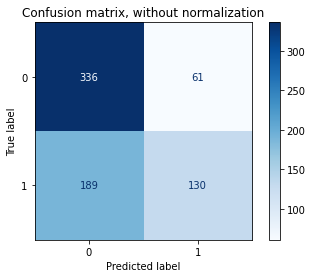

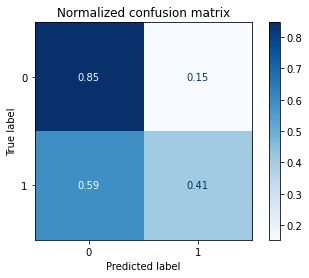

In [ ]:
SVM = svm.SVC(C=1.8, kernel='rbf', degree=8, gamma='auto',probability=True)
SVM.fit(Train_X_trans,Train_Y)
predictions_SVM = SVM.predict(Test_X_trans)
score(Test_Y,predictions_SVM)
confusion_matrix(SVM,Test_X,Test_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  ->  0.6103351955307262
F1        ->  0.5714285714285715
Precision ->  0.5830721003134797
Recall    ->  0.5602409638554217
Confusion matrix, without normalization
[[251 146]
 [133 186]]
Normalized confusion matrix
[[0.63 0.37]
 [0.42 0.58]]


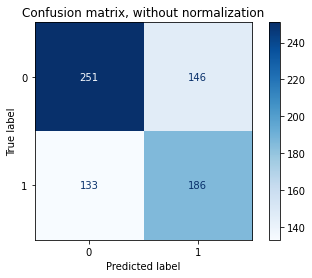

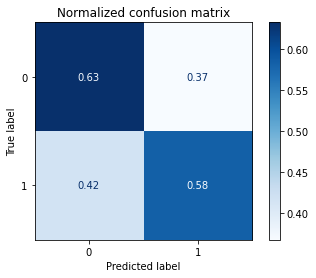

In [ ]:
xg_reg = GradientBoostingClassifier(n_estimators=250, learning_rate=1.3, max_depth=14, random_state=0)
pred_gb = xg_reg.fit(Train_X_trans, Train_Y)
preds_gb = pred_gb.predict(Test_X)
score(Test_Y,preds_gb)
confusion_matrix(pred_gb,Test_X,Test_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  ->  0.4762569832402235
F1        ->  0.6073298429319373
Precision ->  0.9090909090909091
Recall    ->  0.4559748427672956
Confusion matrix, without normalization
[[ 51 346]
 [ 29 290]]
Normalized confusion matrix
[[0.13 0.87]
 [0.09 0.91]]


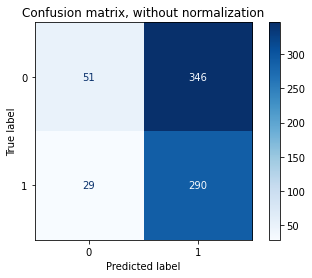

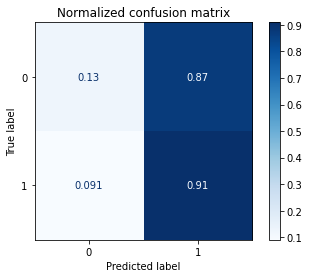

In [ ]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X,Train_Y)
predictions_NB = Naive.predict(Test_X)
score(Test_Y,predictions_NB)
confusion_matrix(Naive,Test_X,Test_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  ->  0.6047486033519553
F1        ->  0.5705614567526556
Precision ->  0.5893416927899686
Recall    ->  0.5529411764705883
Confusion matrix, without normalization
[[245 152]
 [131 188]]
Normalized confusion matrix
[[0.62 0.38]
 [0.41 0.59]]


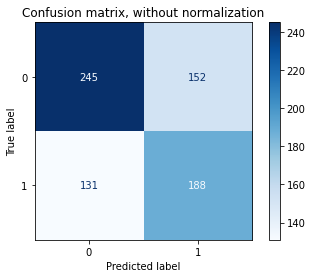

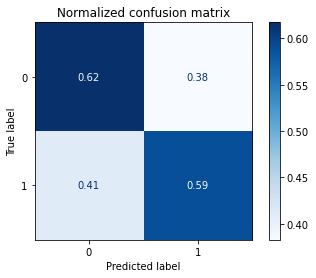

In [ ]:
eclf = VotingClassifier(
    estimators=[('svm', SVM), ('gb', xg_reg), ('nb', Naive)],
    voting='soft',
    weights=[4,3,1],
    flatten_transform=True
)
eclf.fit(Train_X, Train_Y)
predictions_eclf = eclf.predict(Test_X)
score(Test_Y,predictions_eclf)
confusion_matrix(eclf,Test_X,Test_Y)

In [ ]:
# TRAIN NEW WEIGHTS
MLP = MLPClassifier(alpha=1.1, max_iter=250)
MLP.fit(Train_X,Train_Y)

filename = '/content/drive/MyDrive/L4S1/FYP/my/twitter data/MLP2.sav'
pickle.dump(MLP, open(filename, 'wb'))



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
twitter_news= pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/twitter data/Social_Media_Classified_Data(2022_04_06).csv')
twitter_news = twitter_news.dropna()

In [ ]:
twitter_news.head()

In [ ]:
df = twitter_news.drop(['Unnamed: 0','text'],axis=1)

In [ ]:
# LOAD WEIGHTS
filename = '/content/drive/MyDrive/L4S1/FYP/my/twitter data/MLP2.sav'
MLP = pickle.load(open(filename, 'rb'))

predictions_MLP = MLP.predict(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
CLASS = [0,1]

pred_prb = []
actual = []
for i in range(len(df)):
  val = CLASS[np.argmax(predictions_MLP[i])]
  v = predictions_MLP[i]
  # print(v)
  pred_prb.append(v)
  # actual.append(y_test.iloc[i])

pred_df = pd.DataFrame()
# pred_df['Date'] = X_test['date']
pred_df['Tweet'] = twitter_news['text']
pred_df['prediction'] = pred_prb
# pred_df['actual'] = actual

In [ ]:
pred_df.to_csv('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/Hate(2022_04_06).csv')

In [ ]:
pred_df= pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/Hate(2022_04_06).csv')

In [ ]:
pred_df.head()

In [ ]:
pred_df['prediction'].value_counts()

In [ ]:
pred_df['prediction'].value_counts(normalize=True)*100

1    92.513966
0     7.486034
Name: prediction, dtype: float64

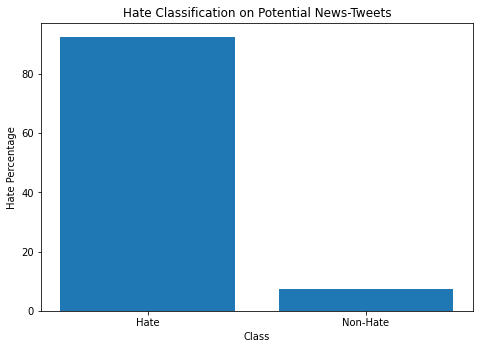

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Hate Percentage')
ax.set_xlabel('Class')
ax.set_title('Hate Classification on Potential News-Tweets')
className = ['Hate','Non-Hate']
percentage = pred_df['prediction'].value_counts(normalize=True)*100
ax.bar(className,percentage)
plt.show()

# **Deep Learning Based model for Textual and Non Textual information Classification - Mass Media => Social Media**

In [ ]:
#create model for textual and non textual features
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.fasttext import FastText
from keras.backend import clear_session

import pandas as pd
import numpy as np
import re
import os

In [ ]:
input = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/News/news_topic_data_2022_03_12_.csv')

In [ ]:
del input['Unnamed: 0']
del input['Unnamed: 0.1']
del input['Unnamed: 0.1.1']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#3
#tokenize
def text_process(text):
  output = []
  count = 0
  tokenized_data = word_tokenize(text)
  for token in tokenized_data:
    if token not in nltk.corpus.stopwords.words('sinhala.txt'):
      if token != 'nan':
        count+=1
        output.append(token) 
  return output,count

In [ ]:
#call method for tokenizing
#for model testing
list_of_articles = []
word_count = []
for doc in input['lemma_new']:
  t,l = text_process(str(doc))
  list_of_articles.append(t)
  word_count.append(l)

list_of_tokens = [item for items in list_of_articles for item in items]

In [ ]:
content_word_perc = []
emotiveness = []
media_availability = []

for index,row in input.iterrows():
  if word_count[index] != 0:
    word_perc = (row['Noun_count']+row['Verb_count']+row['Adj_count']+row['Adv_count'])/(word_count[index])
  else:
    word_perc = 0

  if row['Noun_count'] !=0 | row['Verb_count'] != 0:
    emo = (row['Adj_count']+row['Adv_count'])/(row['Noun_count']+row['Verb_count'])
  else:
    emo = 0

    
  content_word_perc.append(word_perc)
  emotiveness.append(emo)

In [ ]:
input['content_word_perc'] = content_word_perc
input['emotiveness'] = emotiveness

In [ ]:
#sentimental
import helasentilex

sentimental = []
for w in list_of_articles:
  positive = 0
  negative = 0
  neutral = 0
  for token in w:
    if helasentilex.sentiment(token) == 1:
      positive+=1
    elif helasentilex.sentiment(token) == -1:
      negative+=1
    elif helasentilex.sentiment(token) == 0:
      neutral+=1
  if positive > negative:
    sentimental.append(1)
  elif positive < negative:
    sentimental.append(-1)
  else:
    sentimental.append(0)

In [ ]:
news_model_df = pd.DataFrame()
news_model_df['date'] = input['Date']
news_model_df['text'] = input['Headline']
news_model_df['lemma_new'] = input['lemma_new']
news_model_df['content_word_perc'] = content_word_perc
news_model_df['emotiveness'] = emotiveness
news_model_df['sentimental'] = sentimental
news_model_df['class'] = input['category']

In [ ]:
news_model_df.to_csv('/content/drive/MyDrive/L4S1/FYP/my/News/Input_news_topic_balanced_2022_03_26.csv')

In [ ]:
news_model_dfx= pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/News/Input_news_topic_balanced_2022_03_26.csv')

In [ ]:
news_model_dfx.head()

,Unnamed: 0,date,text,lemma_new,content_word_perc,emotiveness,class,category_manual,sentimental
0,0,2021-09-13,අනුරගෙන් සජිත්ට නොසිතූ දැඩි ප‍්‍රහාරයක්…,පවතින තත්ත්වය ආණ්ඩුව රට පාලනය බැරි මැතිවරණයක් ...,0.748201,0.040000,News,geb genim,-1
1,1,2021-09-12,ඉතාලියේදී අගමැති මහින්දට එරෙහිව ලාංකිකයන් විරෝ...,අගමැති මහින්ද රාජපක්ෂ මහතාගේ ඉතාලි සංචාරය අතරත...,0.865089,0.089419,News,pasku,1
2,2,2021-09-11,අගමැති මහින්ද ඉතාලියේ.. ඉතාලියේ ලාංකිකයන් විරෝ...,ඉතාලිය සිටින ලාංකිකයන් හෙට දිනයේ එරට බොලොඤ්ඤා ...,0.857895,0.093960,News,pasku,1
3,3,2021-09-06,නොදන්නා දේ නොකියා හිටපං අප්පුහාමි…- ඥානසාර හිම...,පසුගිය සතියේ මාධ්ය හමුවකදී බෞද්ධ බල සේනා සංවිධ...,0.774633,0.075691,News,pasku,1
4,4,2021-08-09,ඇමති නාමල්ගේ කතාවෙන් මා අසරණ වුනා.. පාරෙ බැහැල...,ලංකාව මලල ක්රීඩිකාව ඔලිම්පික් උළෙලට සහභාගි වීම...,0.723312,0.060703,News,oli,1


In [ ]:
news_model_dfx['class'].value_counts()

No-News    6428
News       6111
Name: class, dtype: int64

In [ ]:
#divide features and label columns
#x for features
#y for labels
X = news_model_dfx.drop('class', axis=1)

y = news_model_dfx['class']

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Encode labels in column 'class'.
y_train_t = label_encoder.fit_transform(y_train)
y_test_t = label_encoder.fit_transform(y_test)

from tensorflow.keras.utils import to_categorical
y_train_t = to_categorical(y_train_t)
y_test_t = to_categorical(y_test_t)

In [ ]:
X1_train = []
for sen in X_train['text']:
  if isinstance(sen,str):
    X1_train.append(sen)
  else:
    X1_train.append(" ")

X1_test = []
for sen in X_test['text']:
  if isinstance(sen,str):
    X1_test.append(sen)
  else:
    X1_test.append(" ")

In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X1_train)

X1_train_t = tokenizer.texts_to_sequences(X1_train)
X1_test_t = tokenizer.texts_to_sequences(X1_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 300

X1_train_t = pad_sequences(X1_train_t, padding='post', maxlen=maxlen)
X1_test_t = pad_sequences(X1_test_t, padding='post', maxlen=maxlen)

In [ ]:
word_embedding_path = '/content/drive/MyDrive/L4S1/FYP/my/300/fastText_300_5'
embedding_matrix_path = '/content/drive/MyDrive/L4S1/FYP/my/twitter data/fasttext_jan_300_5'
word_embedding_keydvectors_path = '/content/drive/MyDrive/L4S1/FYP/my/keyed.kv'

In [ ]:
import io
from numpy import array
from numpy import asarray
from numpy import zeros

word_embedding_model = FastText.load(word_embedding_path)
    
word_vectors = word_embedding_model.wv
word_vectors.save(word_embedding_keydvectors_path)
word_vectors = KeyedVectors.load(word_embedding_keydvectors_path, mmap='r')

embeddings_index = dict()
for word, vocab_obj in word_vectors.vocab.items():
  embeddings_index[word]=word_vectors[word]

# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
#news
X2_train = X_train[['content_word_perc','emotiveness','sentimental']].values
X2_test = X_test[['content_word_perc','emotiveness','sentimental']].values

In [ ]:
input_1 = Input(shape=(maxlen,))
input_2 = Input(shape=(3,))

In [ ]:
#1st sub model for text features
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], trainable=True)(input_1)
LSTM_Layer_1 = LSTM(128,activation='relu',return_sequences=True)(embedding_layer)
Dropout_Layer_1 = Dropout(0.2)(LSTM_Layer_1)
LSTM_Layer_2 = LSTM(128,activation='relu')(Dropout_Layer_1)
Dropout_Layer_2 = Dropout(0.2)(LSTM_Layer_2)

In [ ]:
#2nd submodel for non text features
dense_layer_1 = Dense(32, activation='relu')(input_2)
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)

In [ ]:
#concatenate two models
concat_layer = Concatenate()([Dropout_Layer_2, dense_layer_2])
dense_layer_3 = Dense(32, activation='relu')(concat_layer)
output = Dense(2, activation='sigmoid')(dense_layer_3)
model = Model(inputs=[input_1,input_2], outputs=output)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     4314300     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 300, 128)     219648      ['embedding[0][0]']              
                                                                                                  
 dropout (Dropout)              (None, 300, 128)     0           ['lstm[0][0]']                   
                                                                                              

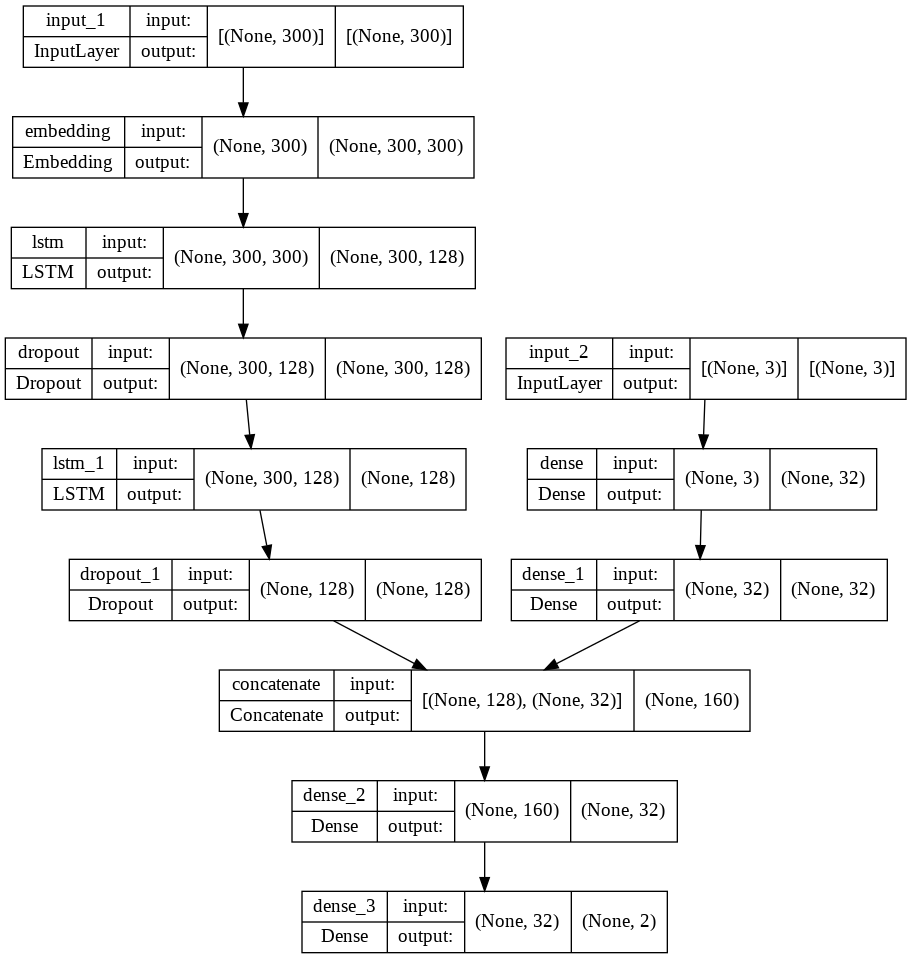

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x=[X1_train_t, X2_train], y=y_train_t, batch_size=128, epochs=50, verbose=1, shuffle=True, validation_data=([X1_test_t, X2_test], y_test_t))

Epoch 1/50
79/79 [==============================] - 248s 3s/step - loss: 0.5993 - acc: 0.6748 - val_loss: 0.5509 - val_acc: 0.7037
Epoch 2/50
79/79 [==============================] - 243s 3s/step - loss: 0.5477 - acc: 0.7054 - val_loss: 0.5472 - val_acc: 0.7037
Epoch 3/50
79/79 [==============================] - 244s 3s/step - loss: 0.5436 - acc: 0.7056 - val_loss: 0.5460 - val_acc: 0.7037
Epoch 4/50
79/79 [==============================] - 243s 3s/step - loss: 0.5435 - acc: 0.7058 - val_loss: 0.5448 - val_acc: 0.7037
Epoch 5/50
79/79 [==============================] - 242s 3s/step - loss: 0.5417 - acc: 0.7059 - val_loss: 0.5451 - val_acc: 0.7041
Epoch 6/50
79/79 [==============================] - 243s 3s/step - loss: 0.5405 - acc: 0.7057 - val_loss: 0.5422 - val_acc: 0.7037
Epoch 7/50
79/79 [==============================] - 243s 3s/step - loss: 0.5390 - acc: 0.7066 - val_loss: 0.5421 - val_acc: 0.7041
Epoch 8/50
79/79 [==============================] - 242s 3s/step - loss: 0.5388 - a

In [ ]:
score = model.evaluate(x=[X1_test_t, X2_test], y=y_test_t, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

79/79 [==============================] - 32s 407ms/step - loss: 0.5374 - acc: 0.7022
Test Score: 0.5374375581741333
Test Accuracy: 0.7021530866622925
acc: 70.22%


In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/modelNews_2022_03_28.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/modelNews_2022_03_28.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/modelNews_2022_03_28.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/modelNews_2022_03_28.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
scores = loaded_model.evaluate(x=[X1_test_t, X2_test], y=y_test_t, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], scores[1]*100))

Loaded model from disk
79/79 [==============================] - 34s 410ms/step - loss: 0.5374 - acc: 0.7022
acc: 70.22%


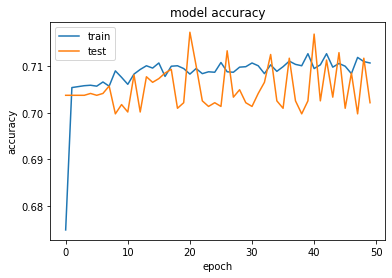

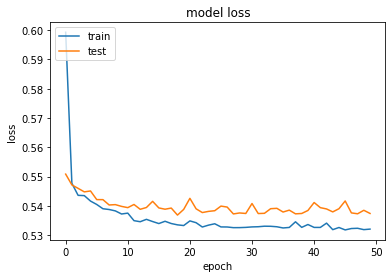

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
prediction = loaded_model.predict([X1_test_t, X2_test])

In [ ]:
CLASS = ['News','No-News']

pred_prb = []
actual = []
for i in range(len(X1_test)):
  val = CLASS[np.argmax(prediction[i])]
  v = prediction[i]
  pred_prb.append(val)
  actual.append(y_test.iloc[i])

pred_df = pd.DataFrame()
pred_df['Date'] = X_test['date']
pred_df['text'] = X1_test
pred_df['prediction'] = pred_prb
pred_df['actual'] = actual

In [ ]:
#matrics calcultaion
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(actual, pred_prb)
print('Accuracy: %.2f' % (accuracy*100))
# precision tp / (tp + fp)
precision = precision_score(actual, pred_prb, pos_label="News")
print('Precision: %.2f' % (precision*100))
# recall: tp / (tp + fn)
recall = recall_score(actual, pred_prb, pos_label="News")
print('Recall: %.2f' % (recall*100))
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(actual, pred_prb, pos_label="News")
print('F1 score: %.2f' % (f1*100))

Accuracy: 70.22
Precision: 90.63
Recall: 95.72
F1 score: 76.69


# Demo

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.tokenize import word_tokenize
import glob

data_content= pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/hate_trend_data(2022-05-06).csv')

In [ ]:
data.head()

,id_x,date,content,user,replyCount,retweetCount,likeCount,media
0,1.520000e+18,2022-04-21 23:58:43+00:00,කසිප්පු ගහලද කුඩු ගහලද 😂😂🤡🤡🤡 #GoHomeRajapaksha...,"{'username': 'peshwijesundara', 'id': 10341322...",2,1,2,NaN
1,1.520000e+18,2022-04-21 23:57:35+00:00,ඞ https://t.co/pQk2afG3rn,"{'username': 'PolarizK', 'id': 4589608035, 'di...",0,0,0,NaN
2,1.520000e+18,2022-04-21 23:55:44+00:00,ආණ්ඩුව කරන්නේ පාස්කු ප්‍රහාරයේ පරීක්ෂණ කරන කාර...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN
3,1.520000e+18,2022-04-21 23:54:19+00:00,ආර්ථිකය කඩා වැටුන .. දූශනයෙන් වංචාවෙන් රට විනා...,"{'username': 'priyanthim123', 'id': 3547622474...",3,2,25,NaN
4,1.520000e+18,2022-04-21 23:54:18+00:00,🔺මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN


In [ ]:
#extract urls
def extract_url(text):
  urls = re.findall("(?P<url>https?://[^\s]+)", text)
  return urls

In [ ]:
data['extracted_urls'] = data['content'].apply(extract_url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#tokenize
def text_process(text):
  gr = []
  tokenized_data = word_tokenize(text)
  for token in tokenized_data:
    if token != 'nan':
      gr.append(token) 
  return gr

In [ ]:
date_tokenized = []
time = []
for doc in data['date']:
  val = text_process(str(doc))
  date_tokenized.append(val[0])
  time.append(val[1])

In [ ]:
data['Date'] = date_tokenized
data['Time'] = time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.head()

,id_x,date,content,user,replyCount,retweetCount,likeCount,media,extracted_urls,Date,Time
0,1.520000e+18,2022-04-21 23:58:43+00:00,කසිප්පු ගහලද කුඩු ගහලද 😂😂🤡🤡🤡 #GoHomeRajapaksha...,"{'username': 'peshwijesundara', 'id': 10341322...",2,1,2,NaN,[https://t.co/byRrSUzi8X],2022-04-21,23:58:43+00:00
1,1.520000e+18,2022-04-21 23:57:35+00:00,ඞ https://t.co/pQk2afG3rn,"{'username': 'PolarizK', 'id': 4589608035, 'di...",0,0,0,NaN,[https://t.co/pQk2afG3rn],2022-04-21,23:57:35+00:00
2,1.520000e+18,2022-04-21 23:55:44+00:00,ආණ්ඩුව කරන්නේ පාස්කු ප්‍රහාරයේ පරීක්ෂණ කරන කාර...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,[https://t.co/d7U7Xp3eNz],2022-04-21,23:55:44+00:00
3,1.520000e+18,2022-04-21 23:54:19+00:00,ආර්ථිකය කඩා වැටුන .. දූශනයෙන් වංචාවෙන් රට විනා...,"{'username': 'priyanthim123', 'id': 3547622474...",3,2,25,NaN,[],2022-04-21,23:54:19+00:00
4,1.520000e+18,2022-04-21 23:54:18+00:00,🔺මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,[https://t.co/Y5Y1JBw6ZX],2022-04-21,23:54:18+00:00


In [ ]:
#sinhala stop word set from UOM NLPC
stopwords=nltk.corpus.stopwords.words('sinhala.txt')

In [ ]:
#remove stop words in each news content
def preprocess_sin(text):
    result=[]
    out = ''
    for token in text :
        if token not in stopwords:
            result.append(token)
            out += token+" "
    return out

In [ ]:
#access each news content column
#sinhala
stopword_removed = []

for columnData in data['content']:
  words = word_tokenize(columnData)
  td=preprocess_sin(words)
  stopword_removed.append(td)
  
data['stopword_removed'] = stopword_removed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id_x,date,content,user,replyCount,retweetCount,likeCount,media,extracted_urls,Date,Time,stopword_removed
0,1.520000e+18,2022-04-21 23:58:43+00:00,කසිප්පු ගහලද කුඩු ගහලද 😂😂🤡🤡🤡 #GoHomeRajapaksha...,"{'username': 'peshwijesundara', 'id': 10341322...",2,1,2,NaN,[https://t.co/byRrSUzi8X],2022-04-21,23:58:43+00:00,කසිප්පු ගහලද කුඩු ගහලද 😂😂🤡🤡🤡 # GoHomeRajapaksh...
1,1.520000e+18,2022-04-21 23:57:35+00:00,ඞ https://t.co/pQk2afG3rn,"{'username': 'PolarizK', 'id': 4589608035, 'di...",0,0,0,NaN,[https://t.co/pQk2afG3rn],2022-04-21,23:57:35+00:00,ඞ https : //t.co/pQk2afG3rn
2,1.520000e+18,2022-04-21 23:55:44+00:00,ආණ්ඩුව කරන්නේ පාස්කු ප්‍රහාරයේ පරීක්ෂණ කරන කාර...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,[https://t.co/d7U7Xp3eNz],2022-04-21,23:55:44+00:00,ආණ්ඩුව කරන්නේ පාස්කු ප්‍රහාරයේ පරීක්ෂණ කරන කාර...
3,1.520000e+18,2022-04-21 23:54:19+00:00,ආර්ථිකය කඩා වැටුන .. දූශනයෙන් වංචාවෙන් රට විනා...,"{'username': 'priyanthim123', 'id': 3547622474...",3,2,25,NaN,[],2022-04-21,23:54:19+00:00,ආර්ථිකය කඩා වැටුන .. දූශනයෙන් වංචාවෙන් රට විනා...
4,1.520000e+18,2022-04-21 23:54:18+00:00,🔺මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,[https://t.co/Y5Y1JBw6ZX],2022-04-21,23:54:18+00:00,🔺මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු...


In [ ]:
#remove unnecessary chars and emojis
import codecs
import nltk
import re


def run_emojiremover(text):
  global total

  tokens = word_tokenize(text)

	# remove all unnessary chars and emojis
	# get only sinhala unicode charactors
  regex = re.compile(u'[^\u0D80-\u0DFF]', re.UNICODE)
  tokens = [regex.sub('', w) for w in tokens]
  tokens = filter(None, tokens)
  
  tokens = list(tokens) #this will remove duplicates

  prev = ""
  stems = {}
  found = 0
  
  result=""
  for w in tokens:
    result +=w+" "

  return result

#access each content column
#sinhala
emoji_removed_data = []

for columnData in data['stopword_removed']:
  words = []
  for word in columnData.split(','):
    words.append(word)
  td=run_emojiremover(columnData)
  if td is not np.nan:
    emoji_removed_data.append(td)

data['emoji_removed_text'] = emoji_removed_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
data.head(10)

,id_x,date,content,user,replyCount,retweetCount,likeCount,media,extracted_urls,Date,Time,stopword_removed,emoji_removed_text
0,1.520000e+18,2022-04-21 23:58:43+00:00,කසිප්පු ගහලද කුඩු ගහලද 😂😂🤡🤡🤡 #GoHomeRajapaksha...,"{'username': 'peshwijesundara', 'id': 10341322...",2,1,2,NaN,[https://t.co/byRrSUzi8X],2022-04-21,23:58:43+00:00,කසිප්පු ගහලද කුඩු ගහලද 😂😂🤡🤡🤡 # GoHomeRajapaksh...,කසිප්පු ගහලද කුඩු ගහලද
1,1.520000e+18,2022-04-21 23:57:35+00:00,ඞ https://t.co/pQk2afG3rn,"{'username': 'PolarizK', 'id': 4589608035, 'di...",0,0,0,NaN,[https://t.co/pQk2afG3rn],2022-04-21,23:57:35+00:00,ඞ https : //t.co/pQk2afG3rn,ඞ
2,1.520000e+18,2022-04-21 23:55:44+00:00,ආණ්ඩුව කරන්නේ පාස්කු ප්‍රහාරයේ පරීක්ෂණ කරන කාර...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,[https://t.co/d7U7Xp3eNz],2022-04-21,23:55:44+00:00,ආණ්ඩුව කරන්නේ පාස්කු ප්‍රහාරයේ පරීක්ෂණ කරන කාර...,ආණ්ඩුව කරන්නේ පාස්කු ප්රහාරයේ පරීක්ෂණ කරන කාර්...
3,1.520000e+18,2022-04-21 23:54:19+00:00,ආර්ථිකය කඩා වැටුන .. දූශනයෙන් වංචාවෙන් රට විනා...,"{'username': 'priyanthim123', 'id': 3547622474...",3,2,25,NaN,[],2022-04-21,23:54:19+00:00,ආර්ථිකය කඩා වැටුන .. දූශනයෙන් වංචාවෙන් රට විනා...,ආර්ථිකය කඩා වැටුන දූශනයෙන් වංචාවෙන් රට විනාශය ...
4,1.520000e+18,2022-04-21 23:54:18+00:00,🔺මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,[https://t.co/Y5Y1JBw6ZX],2022-04-21,23:54:18+00:00,🔺මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු...,මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු ...
5,1.520000e+18,2022-04-21 23:52:41+00:00,🔺රඹුක්කනදී බවුසරයට සහ ත්‍රීරෝද රථයට ගිනි තිබ්බ...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,[https://t.co/Yeu4PQxH6V],2022-04-21,23:52:41+00:00,🔺රඹුක්කනදී බවුසරයට ත්‍රීරෝද රථයට ගිනි තිබ්බේ ක...,රඹුක්කනදී බවුසරයට ත්රීරෝද රථයට ගිනි තිබ්බේ කවු...
6,1.520000e+18,2022-04-21 23:52:32+00:00,පාස්කු ප්‍රහාරයට අදට වසර තුනක්. අහිංසක මිනිසුන...,"{'username': 'Sides862722145', 'id': 140514583...",0,0,3,[{'thumbnailUrl': 'https://pbs.twimg.com/ext_t...,[https://t.co/vUfg26fl9h],2022-04-21,23:52:32+00:00,පාස්කු ප්‍රහාරයට අදට වසර තුනක් . අහිංසක මිනිසු...,පාස්කු ප්රහාරයට අදට වසර තුනක් අහිංසක මිනිසුන් ...
7,1.520000e+18,2022-04-21 23:51:30+00:00,ඞ https://t.co/3Hedmn2scl,"{'username': 'lechuleche', 'id': 9598645732633...",1,0,15,[{'previewUrl': 'https://pbs.twimg.com/media/F...,[https://t.co/3Hedmn2scl],2022-04-21,23:51:30+00:00,ඞ https : //t.co/3Hedmn2scl,ඞ
8,1.520000e+18,2022-04-21 23:48:56+00:00,"""අපි හොරකම් කරලා තියෙනවා නම් නඩු දාන්න"". මෙය ල...","{'username': 'Nemal77PhD', 'id': 1466195686836...",4,10,37,NaN,[],2022-04-21,23:48:56+00:00,`` අපි හොරකම් කරලා තියෙනවා නඩු දාන්න '' . මෙය ...,අපි හොරකම් කරලා තියෙනවා නඩු දාන්න මෙය ලංකාවේ අ...
9,1.520000e+18,2022-04-21 23:48:27+00:00,🔺 කිසිදා නොමැකෙන ජාත්‍යන්තර කැලල පාස්කු දින බෝ...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,[https://t.co/p92QMMBlyJ],2022-04-21,23:48:27+00:00,🔺 කිසිදා නොමැකෙන ජාත්‍යන්තර කැලල පාස්කු දින බෝ...,කිසිදා නොමැකෙන ජාත්යන්තර කැලල පාස්කු දින බෝම්බ...


In [ ]:
#save preprocessed data
data.to_csv('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/pre_tweet_topics(2022-05-06).csv')

In [ ]:
data_for_lemma = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/pre_tweet_topics(2022-05-06).csv', error_bad_lines=False);
lemma_text = []
n_arr = []
v_arr = []
a_arr = []
adv_arr = []
for i in data_for_lemma['emoji_removed_text']:
  #print(i)
  if isinstance(i,str):
    a,b,c,d,e = process_sent(i)
    lemma_text.append(a)
    n_arr.append(b)
    v_arr.append(c)
    a_arr.append(d)
    adv_arr.append(e)
  else:
    lemma_text.append(i)
    n_arr.append(0)
    v_arr.append(0)
    a_arr.append(0)
    adv_arr.append(0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data_for_lemma['lemma_new'] = lemma_text
data_for_lemma['Noun_count'] = n_arr
data_for_lemma['Verb_count'] = v_arr
data_for_lemma['Adj_count'] = a_arr
data_for_lemma['Adv_count'] = adv_arr

In [ ]:
data_for_lemma.to_csv('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/pre_tweet_topics_lemmatized(2022-05-06).csv')

In [ ]:
data_for_lemma.head()

,Unnamed: 0,id_x,date,content,user,replyCount,retweetCount,likeCount,media,extracted_urls,Date,Time,stopword_removed,emoji_removed_text,lemma_new,Noun_count,Verb_count,Adj_count,Adv_count
0,0,1.520000e+18,2022-04-21 23:58:43+00:00,කසිප්පු ගහලද කුඩු ගහලද 😂😂🤡🤡🤡 #GoHomeRajapaksha...,"{'username': 'peshwijesundara', 'id': 10341322...",2,1,2,NaN,['https://t.co/byRrSUzi8X'],2022-04-21,23:58:43+00:00,කසිප්පු ගහලද කුඩු ගහලද 😂😂🤡🤡🤡 # GoHomeRajapaksh...,කසිප්පු ගහලද කුඩු ගහලද,කසිප්පු ගහලද කුඩු ගහලද,4,0,0,0
1,1,1.520000e+18,2022-04-21 23:57:35+00:00,ඞ https://t.co/pQk2afG3rn,"{'username': 'PolarizK', 'id': 4589608035, 'di...",0,0,0,NaN,['https://t.co/pQk2afG3rn'],2022-04-21,23:57:35+00:00,ඞ https : //t.co/pQk2afG3rn,ඞ,ඞ,1,0,0,0
2,2,1.520000e+18,2022-04-21 23:55:44+00:00,ආණ්ඩුව කරන්නේ පාස්කු ප්‍රහාරයේ පරීක්ෂණ කරන කාර...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,['https://t.co/d7U7Xp3eNz'],2022-04-21,23:55:44+00:00,ආණ්ඩුව කරන්නේ පාස්කු ප්‍රහාරයේ පරීක්ෂණ කරන කාර...,ආණ්ඩුව කරන්නේ පාස්කු ප්රහාරයේ පරීක්ෂණ කරන කාර්...,ආණ්ඩුව කරන්නේ පාස්කු ප්රහාරයේ පරීක්ෂණ කාර්යභාර...,7,1,0,0
3,3,1.520000e+18,2022-04-21 23:54:19+00:00,ආර්ථිකය කඩා වැටුන .. දූශනයෙන් වංචාවෙන් රට විනා...,"{'username': 'priyanthim123', 'id': 3547622474...",3,2,25,NaN,[],2022-04-21,23:54:19+00:00,ආර්ථිකය කඩා වැටුන .. දූශනයෙන් වංචාවෙන් රට විනා...,ආර්ථිකය කඩා වැටුන දූශනයෙන් වංචාවෙන් රට විනාශය ...,ආර්ථිකය කඩා වැටුන දූශනයෙන් වංචාවෙන් රට විනාශය ...,20,6,0,0
4,4,1.520000e+18,2022-04-21 23:54:18+00:00,🔺මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු...,"{'username': 'YeshanHewage', 'id': 947065105, ...",0,0,0,NaN,['https://t.co/Y5Y1JBw6ZX'],2022-04-21,23:54:18+00:00,🔺මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු...,මේ ජනතා අරගලය බත් පැකට් එකට අරක්කු බෝතලයට ආපු ...,ජනතා අරගලය බත් පැකට් අරක්කු බෝතලයට ආපු සටනක් න...,10,3,0,0


In [ ]:
#tokenize
def text_process(text):
  output = []
  count = 0
  tokenized_data = word_tokenize(text)
  for token in tokenized_data:
    if token not in stopwords:
      if token != 'nan':
        count+=1
        output.append(token) 
  return output,count

In [ ]:
#call method for tokenizing
#for model testing
list_of_articles = []
word_count = []
for doc in data_for_lemma['lemma_new']:
  t,l = text_process(str(doc))
  list_of_articles.append(t)
  word_count.append(l)

list_of_tokens = [item for items in list_of_articles for item in items]

Equation (1) and (2) shows how emotiveness and percentage of content words were calculated. Emotiveness was computed as the sum of the number of adjectives and adverbs over the sum of nouns and verbs [Zhou et al, 2002]. The percentage of content words denotes the rich text with meaning. Content words are words that have meaning. Nouns, verbs, adjectives, and adverbs are content parts of speech [Oliveiria, 2021].


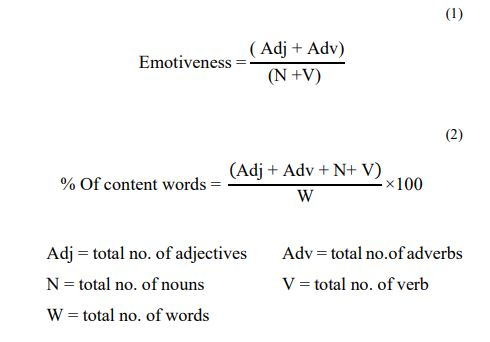

In [ ]:
content_word_perc = []
emotiveness = []
media_availability = []
data_for_lemma['media'] = data_for_lemma['media'].astype(str)
for index,row in data_for_lemma.iterrows():
  if word_count[index] != 0:
    word_perc = (row['Noun_count']+row['Verb_count']+row['Adj_count']+row['Adv_count'])/(word_count[index])
  else:
    word_perc = 0

  if row['Noun_count'] !=0 | row['Verb_count'] != 0:
    emo = (row['Adj_count']+row['Adv_count'])/(row['Noun_count']+row['Verb_count'])
  else:
    emo = 0
 
  if row['media'] == 'nan':
    med = 0
  else:
    med = 1
    
  content_word_perc.append(word_perc)
  emotiveness.append(emo)
  media_availability.append(med)

In [ ]:
data_for_lemma['content_word_perc'] = content_word_perc
data_for_lemma['emotiveness'] = emotiveness
data_for_lemma['media_availability'] = media_availability

In [ ]:
!pip install helasentilex

     |████████████████████████████████| 65 kB 2.4 MB/s 


In [ ]:
#sentimental
import helasentilex

sentimental = []
for w in list_of_articles:
  positive = 0
  negative = 0
  neutral = 0
  for token in w:
    if helasentilex.sentiment(token) == 1:
      positive+=1
    elif helasentilex.sentiment(token) == -1:
      negative+=1
    elif helasentilex.sentiment(token) == 0:
      neutral+=1
  if positive > negative:
    sentimental.append(1)
  elif positive < negative:
    sentimental.append(-1)
  else:
    sentimental.append(0)

In [ ]:
news_model_df = pd.DataFrame()
news_model_df['date'] = data_for_lemma['Date']
news_model_df['text'] = data_for_lemma['lemma_new']
news_model_df['replyCount'] = data_for_lemma['replyCount']#tweets
news_model_df['retweetCount'] = data_for_lemma['retweetCount']#tweets
news_model_df['likeCount'] = data_for_lemma['likeCount']#tweets
news_model_df['media_availability'] = media_availability#tweets
news_model_df['content_word_perc'] = content_word_perc
news_model_df['emotiveness'] = emotiveness
news_model_df['sentimental'] = sentimental

In [ ]:
news_model_df.to_csv('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/Input_for_model_demo(2022-05-06).csv')

In [ ]:
news_model_df = pd.read_csv('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/Input_for_model_demo(2022-05-06).csv', error_bad_lines=False);

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
text_data = []
for sen in news_model_df['text']:
  if isinstance(sen,str):
    text_data.append(sen)
  else:
    text_data.append(" ")

In [ ]:
from keras.preprocessing.text import Tokenizer
from numpy import array
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.fasttext import FastText
from keras.backend import clear_session

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(text_data)

text_data_input = tokenizer.texts_to_sequences(text_data)
vocab_size = len(tokenizer.word_index) + 1
maxlen = 300

text_data_input = pad_sequences(text_data_input, padding='post', maxlen=maxlen)

In [ ]:
word_embedding_path = '/content/drive/MyDrive/L4S1/FYP/my/300/fastText_300_5'
embedding_matrix_path = '/content/drive/MyDrive/L4S1/FYP/my/twitter data/fasttext_jan_300_5'
word_embedding_keydvectors_path = '/content/drive/MyDrive/L4S1/FYP/my/keyed.kv'

In [ ]:
import io
from numpy import array
from numpy import asarray
from numpy import zeros

word_embedding_model = FastText.load(word_embedding_path)
    
word_vectors = word_embedding_model.wv
word_vectors.save(word_embedding_keydvectors_path)
word_vectors = KeyedVectors.load(word_embedding_keydvectors_path, mmap='r')

embeddings_index = dict()
for word, vocab_obj in word_vectors.vocab.items():
  embeddings_index[word]=word_vectors[word]

# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
numeric_inputs = news_model_df[['replyCount','retweetCount','likeCount','content_word_perc', 'emotiveness','sentimental','media_availability']].values

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/model_2021_12_01.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/L4S1/FYP/my/FYP_Other/model_2021_12_01.h5")
print("Loaded model from disk")

loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
prediction = loaded_model.predict([text_data_input, numeric_inputs])

Loaded model from disk


In [ ]:
CLASS = ['News-Tweet','No-News-Tweet']

pred_prb = []

for i in range(len(text_data)):
  val = CLASS[np.argmax(prediction[i])]
  v = prediction[i]
  pred_prb.append(val)
  

pred_df = pd.DataFrame()
pred_df['Date'] = news_model_df['date']
pred_df['text'] = text_data
pred_df['media_availability'] = news_model_df['media_availability']
pred_df['prediction'] = pred_prb

In [ ]:
pred_df['prediction'].value_counts()

News-Tweet       35069
No-News-Tweet     6832
Name: prediction, dtype: int64

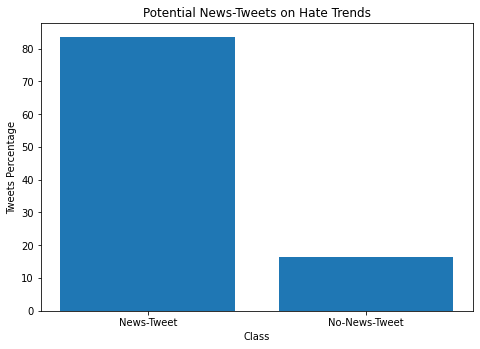

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Tweets Percentage')
ax.set_xlabel('Class')
ax.set_title('Potential News-Tweets on Hate Trends')
className = ['News-Tweet','No-News-Tweet']
percentage = pred_df['prediction'].value_counts(normalize=True)*100
ax.bar(className,percentage)
plt.show()